<a href="https://colab.research.google.com/github/tare-degi/Data-Preprocessing-for-ML-using-Titanic-Dataset/blob/main/email_spam_detection_highst_accuracy_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ================================
# IMPORT LIBRARIES
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from scipy.sparse import hstack

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving emails.csv to emails.csv


**DATA LOAD AND CLEANING**

This code performs ***data cleaning and preparation*** on a spam message dataset. Here is a description of how the code works:

***Purpose:*** The code processes a raw spam message dataset to create a clean, structured version suitable for machine learning projects.

Step-by-step process:

**Data Loading:** The code begins by loading the "spam.csv" file using Latin-1 encoding to handle special characters. It includes error handling to check if the file exists in the correct location.

**Data Exploration:** The code examines the dataset structure by displaying the column names and showing the first two messages, providing visibility into the raw data format.

**Column Identification:** It automatically identifies which columns contain the message labels (spam/ham) and message text by selecting the first two columns from the original dataset.

Data Cleaning:

-Creates a new dataframe containing only the essential label and text columns

-Renames the columns to more descriptive names ('label' and 'text')

-Removes duplicate messages to ensure data quality

**Data Analysis:** The code provides summary statistics including total message count, spam message count, and ham (normal) message count, giving an overview of the dataset composition.

**Sample Display:** It shows examples of both spam and ham messages from the cleaned dataset, allowing for visual verification of the data.

**Data Export:** Finally, the cleaned dataset is saved as "cleaned_spam.csv" without row indices, creating a ready-to-use file for machine learning applications.

Output: The process results in a cleaned CSV file containing only unique messages with clear labeling, properly structured for training spam detection models or other text classification tasks. The code provides progress updates at each step and confirms successful completion of the data preparation pipeline.

In [ ]:
import pandas as pd
import os

print("STEP 1: Loading the dataset...")

# Try loading emails.csv OR spam.csv
df = None

if os.path.exists("emails.csv"):
    df = pd.read_csv("emails.csv", encoding="latin-1")
    print("Loaded 'emails.csv' successfully!")

elif os.path.exists("emails.csv"):
    df = pd.read_csv("emails.csv", encoding="latin-1")
    print("Loaded 'emails.csv' successfully!")

else:
    print("ERROR: Could not load 'emails.csv' or 'spam.csv'")
    print("Make sure one of these files is in the same folder as this code.")
    raise SystemExit()   # stops the program safely

print(f"Found {len(df)} messages with {len(df.columns)} columns")

# Step 2: Show what columns we have
print("\nSTEP 2: Looking at the data structure...")
print("Column names found:", list(df.columns))

print("\nFirst 2 messages:")
print(df.head(2))

# Step 3: Figure out which columns to use
print("\nSTEP 3: Finding the right columns...")
first_column = df.columns[0]
second_column = df.columns[1]

print(f"Using '{first_column}' as the label column (spam/ham)")
print(f"Using '{second_column}' as the text column (message content)")

# Step 4: Create a clean dataset with just these two columns
print("\nSTEP 4: Creating clean dataset...")
clean_df = df[[first_column, second_column]].copy()
clean_df.columns = ['label', 'text']
print("Renamed columns to 'label' and 'text'")

# Step 5: Remove duplicates
print("\nSTEP 5: Removing duplicate messages...")
before_duplicates = len(clean_df)
clean_df = clean_df.drop_duplicates()
after_duplicates = len(clean_df)
duplicates_removed = before_duplicates - after_duplicates

print(f"Removed {duplicates_removed} duplicate messages")
print(f"Now we have {after_duplicates} unique messages")

# Step 6: Show final results
print("\nSTEP 6: Final results...")
print(f"Total messages: {len(clean_df)}")
print(f"Spam messages: {len(clean_df[clean_df['label'] == 'spam'])}")
print(f"Ham messages: {len(clean_df[clean_df['label'] == 'ham'])}")

# Step 7: Save cleaned data
print("\nSTEP 7: Saving cleaned data...")
clean_df.to_csv("cleaned_emails.csv", index=False)
print("Cleaned data saved as 'cleaned_emails.csv'")

print("\nALL DONE! Your cleaned dataset is ready to use!")


STEP 1: Loading the dataset...
Loaded 'emails.csv' successfully!
Found 5572 messages with 2 columns

STEP 2: Looking at the data structure...
Column names found: ['Category', 'Message']

First 2 messages:
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...

STEP 3: Finding the right columns...
Using 'Category' as the label column (spam/ham)
Using 'Message' as the text column (message content)

STEP 4: Creating clean dataset...
Renamed columns to 'label' and 'text'

STEP 5: Removing duplicate messages...
Removed 415 duplicate messages
Now we have 5157 unique messages

STEP 6: Final results...
Total messages: 5157
Spam messages: 641
Ham messages: 4516

STEP 7: Saving cleaned data...
Cleaned data saved as 'cleaned_emails.csv'

ALL DONE! Your cleaned dataset is ready to use!


**Exploratory Data Analysis (EDA) Code Summary**

This code performs comprehensive data analysis on a spam message dataset through these main steps:

1. Dataset Overview

Examines basic structure and statistics of the data

Shows data types, missing values, and general information

2. Class Distribution Analysis

Visualizes and calculates spam vs ham message counts

Computes class imbalance ratio

3. Text Analysis

Analyzes message length in characters and words

Compares text statistics between spam and ham messages

Creates distribution charts and comparative box plots

4. Statistical Relationships

Calculates correlations between text features

Provides numerical insights into data patterns

5. Additional Insights

Identifies data quality issues

Reveals characteristics that distinguish spam from ham


--- BASIC INFO ---
<class 'pandas.core.frame.DataFrame'>
Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5157 non-null   object
 1   text    5157 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB
None

--- SUMMARY ---
       label                        text
count   5157                        5157
unique     2                        5157
top      ham  Rofl. Its true to its name
freq    4516                           1


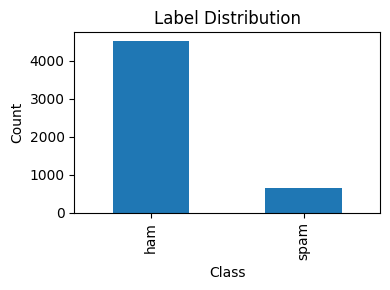


Class Distribution:
label
ham     4516
spam     641
Name: count, dtype: int64
Imbalance ratio: spam/ham = 641/4516 = 0.14


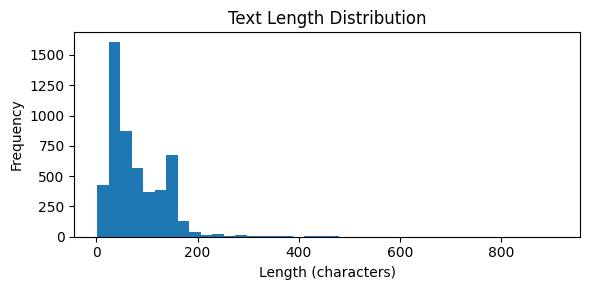


Text Length Statistics by Class:
        count        mean        std  min    25%    50%    75%    max
label                                                                
ham    4516.0   70.951063  56.730031  2.0   34.0   53.0   91.0  910.0
spam    641.0  137.541342  30.516111  7.0  132.0  148.0  157.0  224.0


<Figure size 600x300 with 0 Axes>

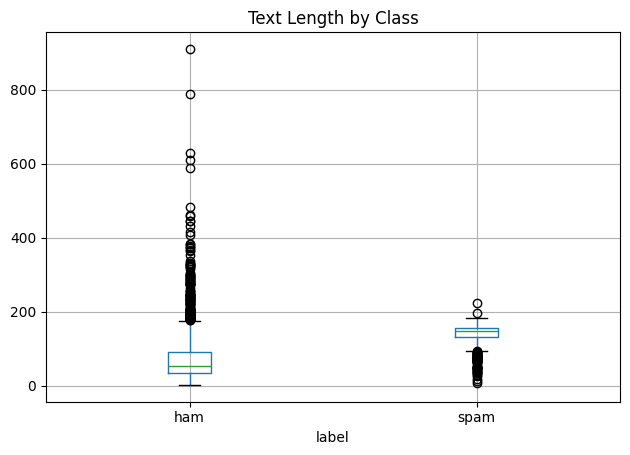

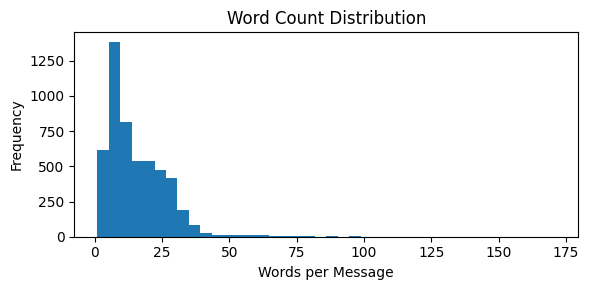


Word Count Statistics by Class:
        count       mean        std  min   25%   50%   75%    max
label                                                            
ham    4516.0  14.239814  11.179471  1.0   7.0  11.0  19.0  171.0
spam    641.0  23.659906   6.038659  1.0  21.0  25.0  28.0   35.0


<Figure size 600x300 with 0 Axes>

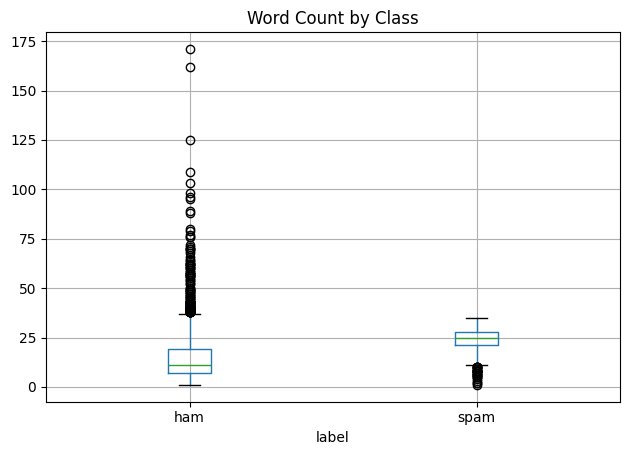


Correlation matrix:
            text_len  word_count
text_len    1.000000    0.973843
word_count  0.973843    1.000000

--- ADDITIONAL INSIGHTS ---
Average text length - Spam: 137.5 characters
Average text length - Ham: 71.0 characters
Average word count - Spam: 23.7 words
Average word count - Ham: 14.2 words

Messages with less than 10 characters: 32
Short message examples:
  Label: ham, Text: 'I'm home.'
  Label: ham, Text: 'Yup'
  Label: ham, Text: 'Thanx...'


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# ================================
# 2. EDA (Summary, Plots, Stats)
# ================================

print("\n--- BASIC INFO ---")
print(clean_df.info())

print("\n--- SUMMARY ---")
print(clean_df.describe(include='all'))

# Class distribution
plt.figure(figsize=(4,3))
clean_df["label"].value_counts().plot(kind="bar", title="Label Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

print("\nClass Distribution:")
print(clean_df["label"].value_counts())

# Check imbalance ratio
ham = clean_df["label"].value_counts()["ham"]
spam = clean_df["label"].value_counts()["spam"]
print(f"Imbalance ratio: spam/ham = {spam}/{ham} = {spam/ham:.2f}")

# Text length analysis
clean_df["text_len"] = clean_df["text"].astype(str).apply(len)

plt.figure(figsize=(6,3))
plt.hist(clean_df["text_len"], bins=40)
plt.title("Text Length Distribution")
plt.xlabel("Length (characters)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Text length statistics by class
print("\nText Length Statistics by Class:")
print(clean_df.groupby("label")["text_len"].describe())

# Text length by class box plot
plt.figure(figsize=(6,3))
clean_df.boxplot(column="text_len", by="label")
plt.title("Text Length by Class")
plt.suptitle("")  # Remove automatic title
plt.tight_layout()
plt.show()

# Word count analysis
clean_df["word_count"] = clean_df["text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(6,3))
plt.hist(clean_df["word_count"], bins=40)
plt.title("Word Count Distribution")
plt.xlabel("Words per Message")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

print("\nWord Count Statistics by Class:")
print(clean_df.groupby("label")["word_count"].describe())

# Word count by class box plot
plt.figure(figsize=(6,3))
clean_df.boxplot(column="word_count", by="label")
plt.title("Word Count by Class")
plt.suptitle("")  # Remove automatic title
plt.tight_layout()
plt.show()

# Correlation (only numeric)
print("\nCorrelation matrix:")
print(clean_df[["text_len", "word_count"]].corr())

# Additional insights
print("\n--- ADDITIONAL INSIGHTS ---")
print(f"Average text length - Spam: {clean_df[clean_df['label']=='spam']['text_len'].mean():.1f} characters")
print(f"Average text length - Ham: {clean_df[clean_df['label']=='ham']['text_len'].mean():.1f} characters")
print(f"Average word count - Spam: {clean_df[clean_df['label']=='spam']['word_count'].mean():.1f} words")
print(f"Average word count - Ham: {clean_df[clean_df['label']=='ham']['word_count'].mean():.1f} words")

# Check for very short messages
short_messages = clean_df[clean_df["text_len"] < 10]
print(f"\nMessages with less than 10 characters: {len(short_messages)}")
if len(short_messages) > 0:
    print("Short message examples:")
    for idx, row in short_messages.head(3).iterrows():
        print(f"  Label: {row['label']}, Text: '{row['text']}'")

**Preprocessing**

This code prepares the spam message data for machine learning in 3 simple steps:

1. Label Preparation

Converts text labels "ham" and "spam" to numbers (0 and 1)

Makes the labels readable for machine learning algorithms

2. Text Conversion

Transforms message text into numerical format using TF-IDF

Extracts the most important words as features

Creates a numerical representation of the text content

3. Data Splitting

Divides the data into two sets:

Training set (80%): Used to teach the model

Test set (20%): Used to evaluate the model's performance

Ensures the model can be properly trained and tested

Output: Clean, numerical data ready for building a spam detection model.

BEFORE PREPROCESSING - DATA EXPLORATION
Dataset Info:
Shape: (5157, 4)
Columns: ['label', 'text', 'text_len', 'word_count']

First 5 rows:
  label                                               text  text_len  \
0   ham  Go until jurong point, crazy.. Available only ...       111   
1   ham                      Ok lar... Joking wif u oni...        29   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...       155   
3   ham  U dun say so early hor... U c already then say...        49   
4   ham  Nah I don't think he goes to usf, he lives aro...        61   

   word_count  
0          20  
1           6  
2          28  
3          11  
4          13  

Label Distribution:
label
ham     4516
spam     641
Name: count, dtype: int64


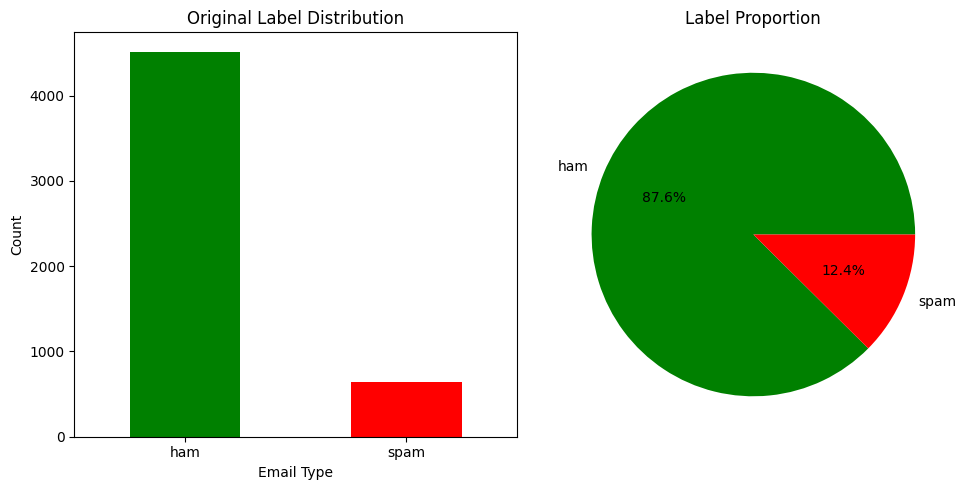

/tmp/ipython-input-1927280922.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clean_df, x='label', y='text_len', palette=['green', 'red'])


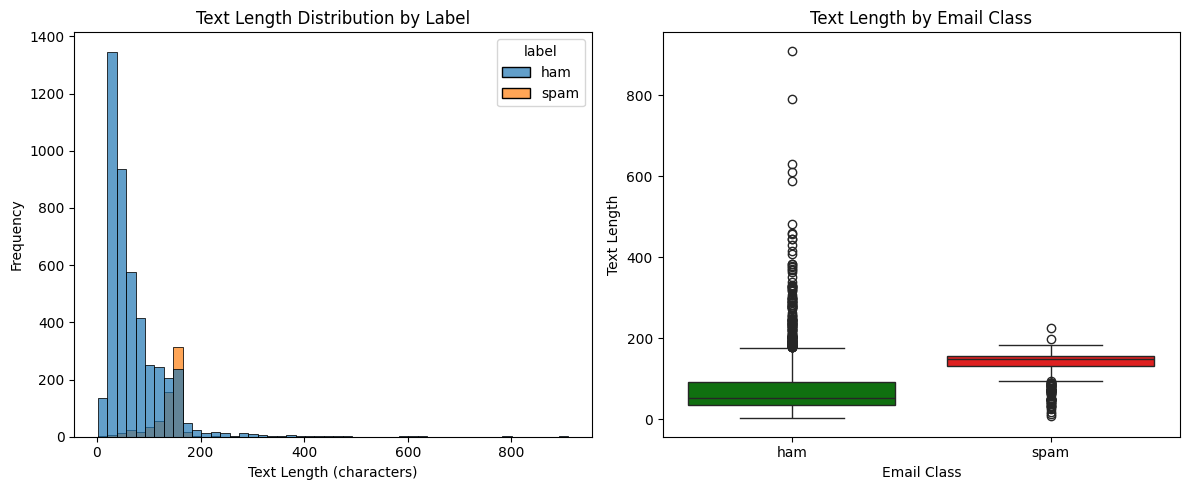


Text Length Statistics:
        count        mean        std  min    25%    50%    75%    max
label                                                                
ham    4516.0   70.951063  56.730031  2.0   34.0   53.0   91.0  910.0
spam    641.0  137.541342  30.516111  7.0  132.0  148.0  157.0  224.0

PREPROCESSING STEPS
STEP 1: Prepare the labels...
Labels converted to numbers
Label mapping: ham -> 0, spam -> 1
Label distribution in numbers: {0: 4516, 1: 641}

STEP 2: Prepare the text features...
Text converted to numerical features
TF-IDF matrix shape: (5157, 2000)
Vocabulary size: 2000

STEP 3: Add text length as feature...
Text length feature added
Combined features shape: (5157, 2001)

STEP 4: Split data for training and testing...
Data split completed:
Training samples: 4125
Test samples: 1032
Number of features: 2001
Training label distribution: {0: 3612, 1: 513}
Test label distribution: {0: 904, 1: 128}

Preprocessing finished! Data ready for model training.

AFTER PREPROCES

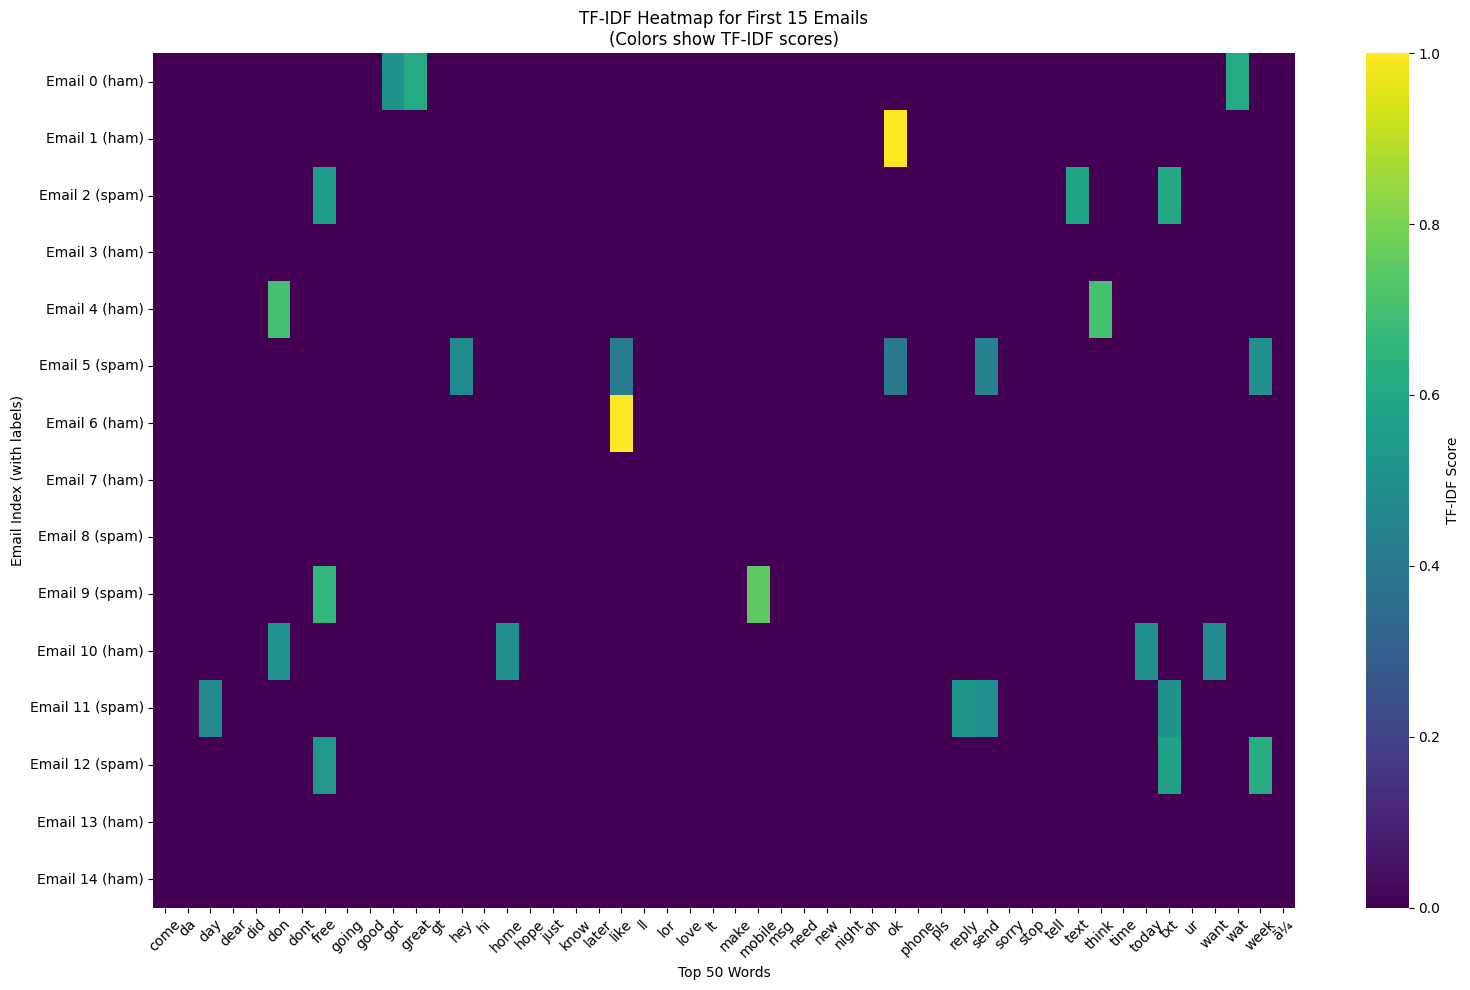

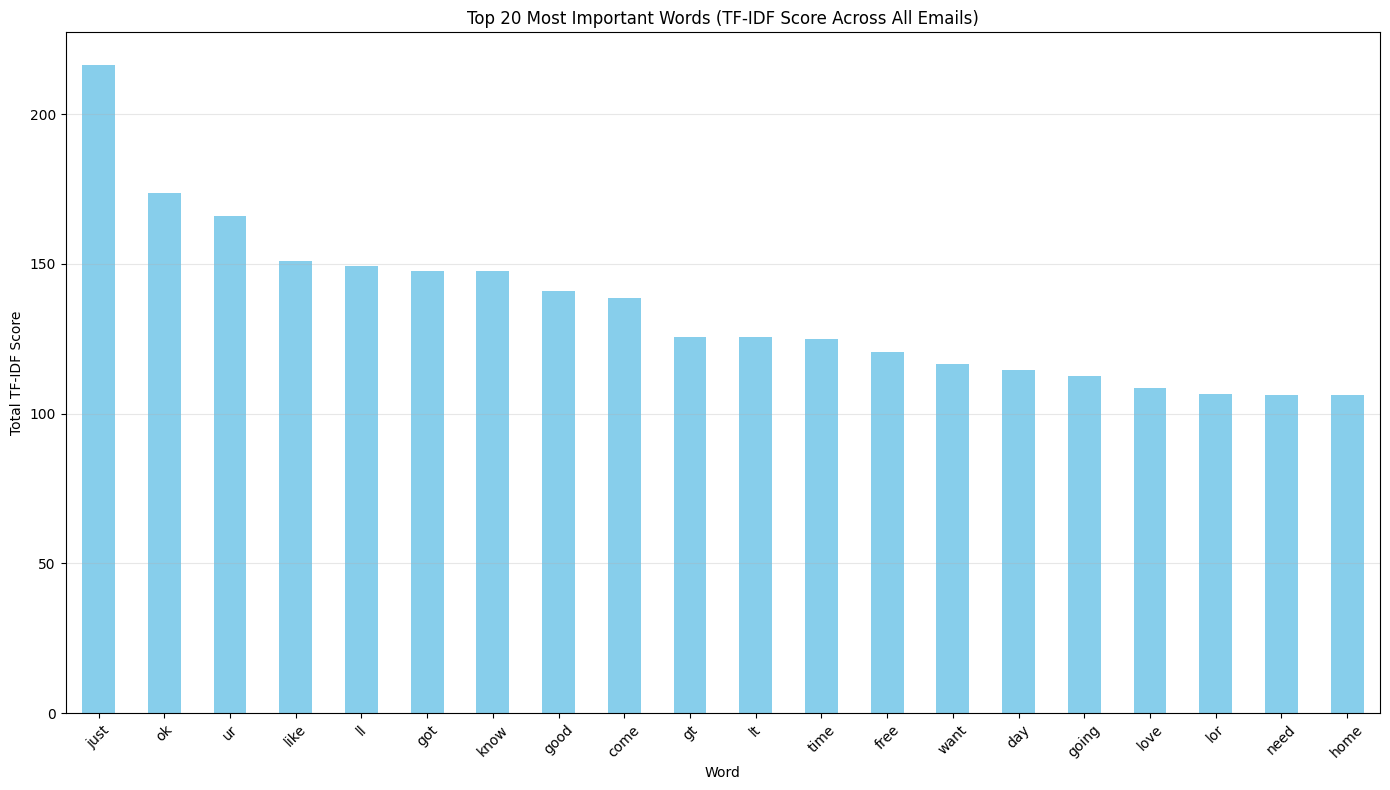


Top 10 Most Important Words:
1. just: 216.5468
2. ok: 173.6503
3. ur: 165.8723
4. like: 151.0211
5. ll: 149.4407
6. got: 147.7478
7. know: 147.6325
8. good: 141.0662
9. come: 138.5774
10. gt: 125.7551


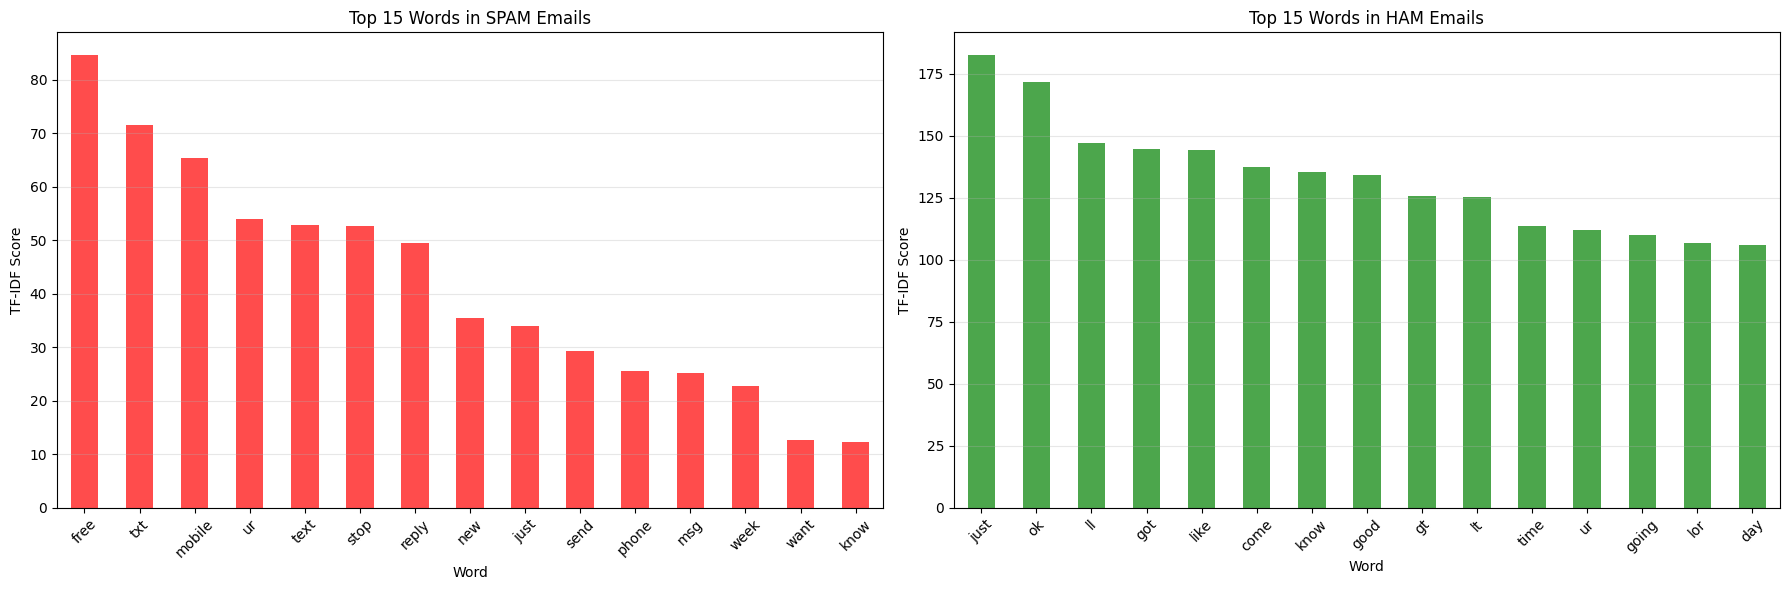


Individual Email Analysis:


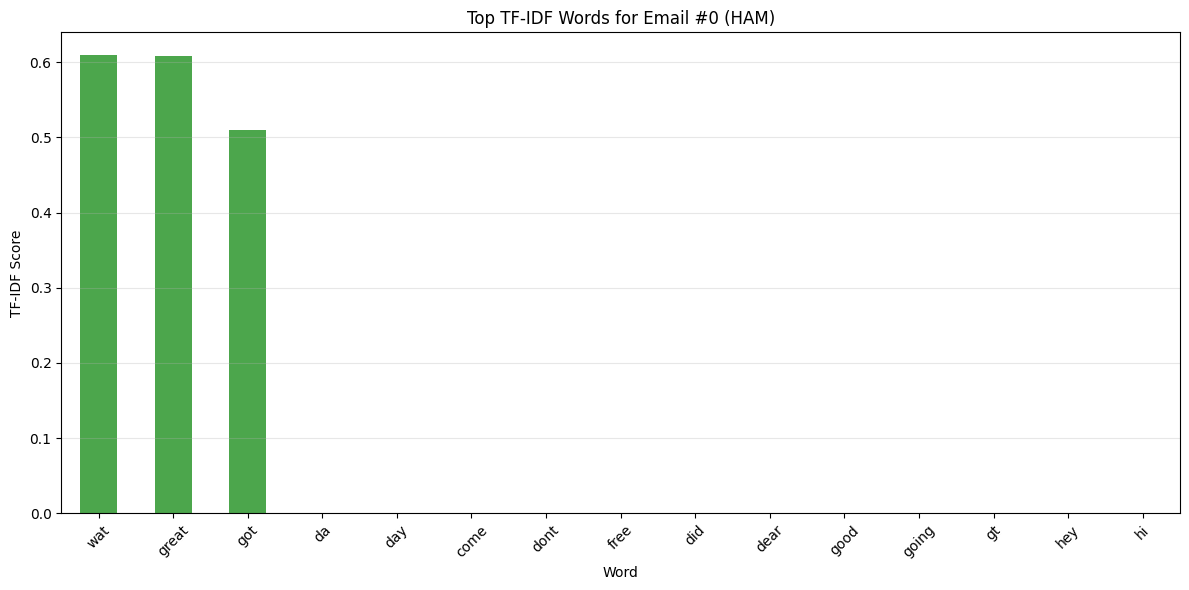

Email #0 (HAM) preview:
Text: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat......
Text length: 111 characters



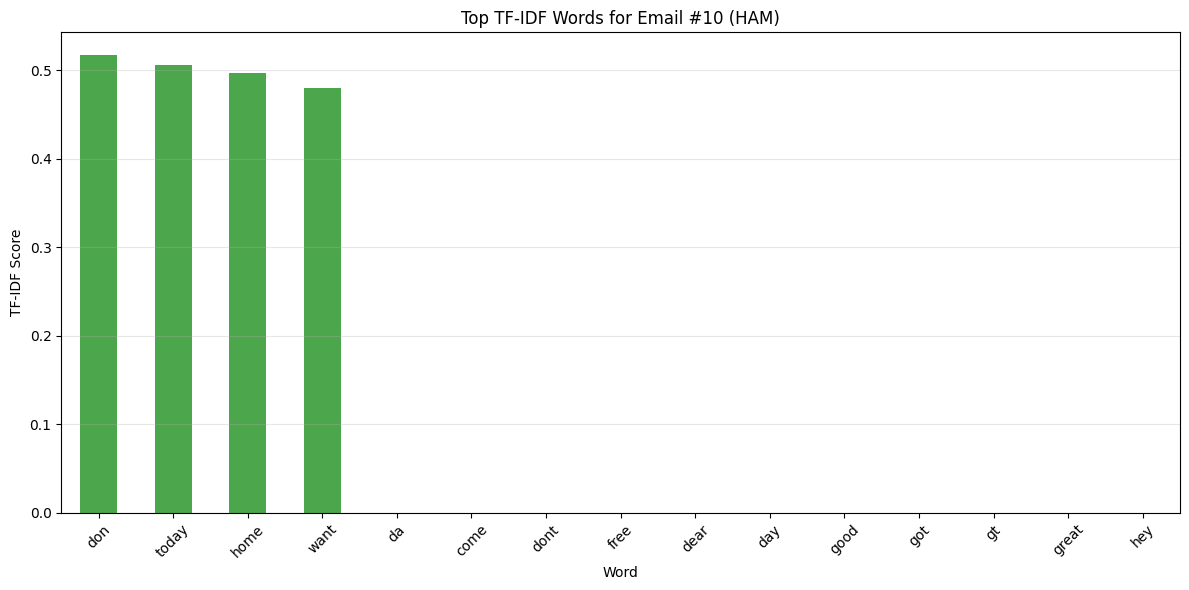

Email #10 (HAM) preview:
Text: I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today....
Text length: 109 characters


Generating Word Clouds...


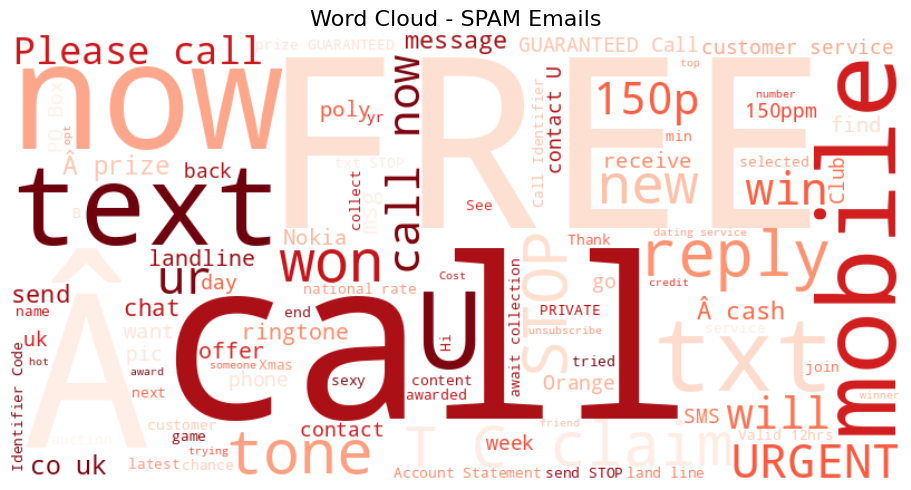

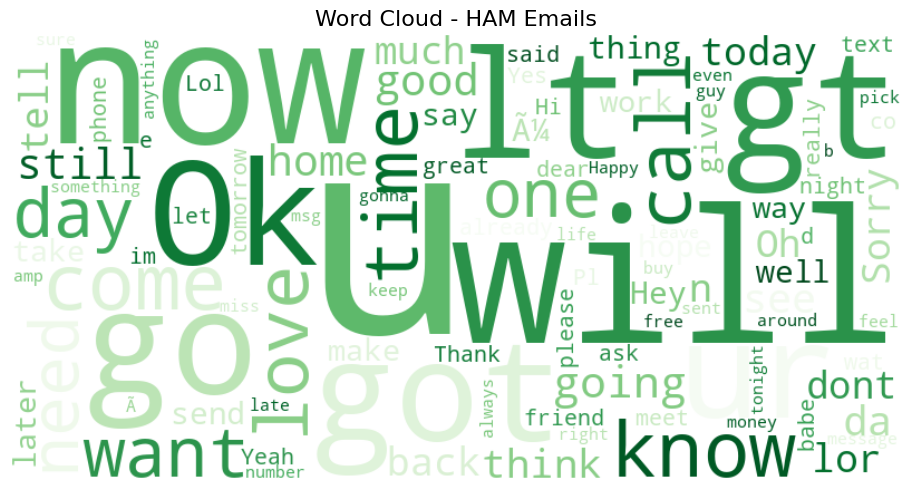


Analyzing Feature Correlations...


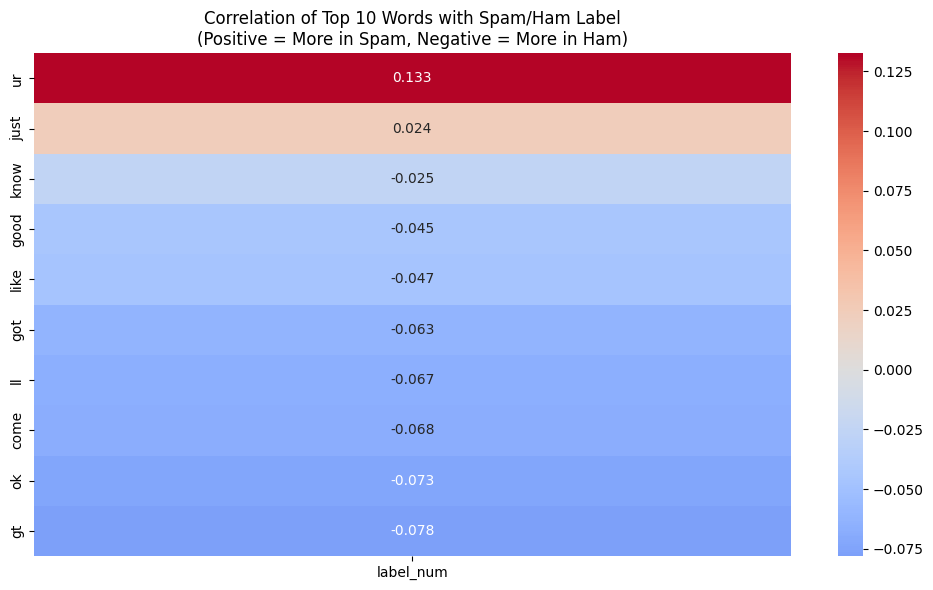


Creating Dimensionality Reduction Visualization...


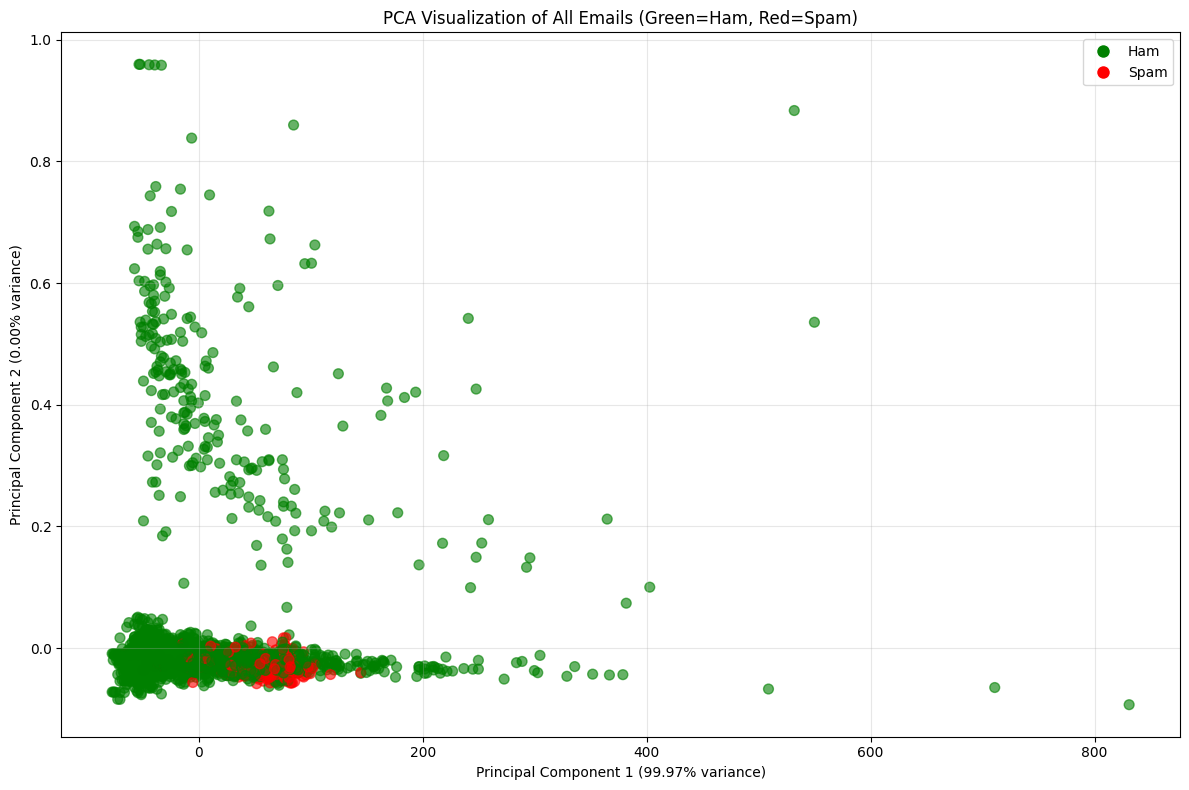

PCA Explained Variance: PC1: 1.000, PC2: 0.000
Total Variance Explained: 1.000

Training and Test Set Analysis:


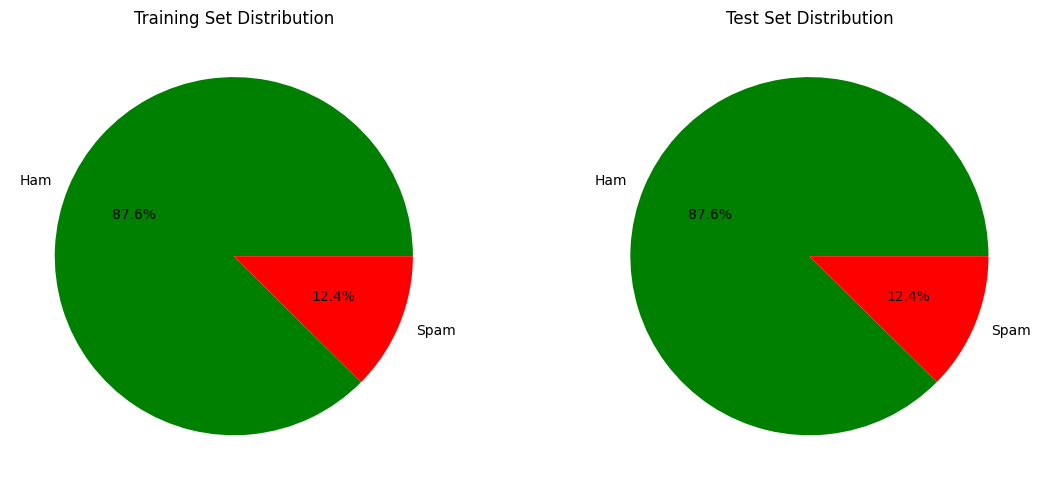


Feature Importance Analysis by Class:

Top 10 Words by Class:
  Spam_Words  Spam_Score Ham_Words   Ham_Score
0       free   84.657837      just  182.664982
1        txt   71.553246        ok  171.675147
2     mobile   65.449173        ll  147.239351
3         ur   53.895812       got  144.731509
4       text   52.891184      like  144.246034
5       stop   52.599350      come  137.570466
6      reply   49.518050      know  135.310285
7        new   35.418587      good  134.134475
8       just   33.881862        gt  125.755127
9       send   29.343099        lt  125.469331

PREPROCESSING SUMMARY
✓ Original dataset shape: (5157, 5)
✓ Processed features shape: (5157, 2001)
✓ Training set: 4125 samples
✓ Test set: 1032 samples
✓ Number of TF-IDF features: 2000
✓ Additional feature: text length
✓ Label distribution maintained in train/test splits
✓ Data ready for machine learning models

Key Insights from Visualization:
✓ Top spam words: free, txt, mobile, ur, text
✓ Top ham words: just, o

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# ================================
# 1. DATA EXPLORATION (Before Processing)
# ================================

print("=" * 50)
print("BEFORE PREPROCESSING - DATA EXPLORATION")
print("=" * 50)

print("Dataset Info:")
print(f"Shape: {clean_df.shape}")
print(f"Columns: {clean_df.columns.tolist()}")
print("\nFirst 5 rows:")
print(clean_df.head())

print("\nLabel Distribution:")
print(clean_df['label'].value_counts())

# Visualize original label distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
clean_df['label'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Original Label Distribution')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
clean_df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Label Proportion')
plt.ylabel('')

plt.tight_layout()
plt.show()

# Text length analysis before processing
clean_df['text_len'] = clean_df['text'].str.len()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=clean_df, x='text_len', hue='label', bins=50, alpha=0.7)
plt.title('Text Length Distribution by Label')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(data=clean_df, x='label', y='text_len', palette=['green', 'red'])
plt.title('Text Length by Email Class')
plt.xlabel('Email Class')
plt.ylabel('Text Length')

plt.tight_layout()
plt.show()

print("\nText Length Statistics:")
print(clean_df.groupby('label')['text_len'].describe())

# ================================
# 2. PREPROCESSING
# ================================

print("\n" + "=" * 50)
print("PREPROCESSING STEPS")
print("=" * 50)

print("STEP 1: Prepare the labels...")
# Convert spam/ham to numbers: ham=0, spam=1
clean_df["label_num"] = clean_df["label"].map({"ham": 0, "spam": 1})
print("Labels converted to numbers")
print(f"Label mapping: ham -> 0, spam -> 1")
print(f"Label distribution in numbers: {clean_df['label_num'].value_counts().to_dict()}")

print("\nSTEP 2: Prepare the text features...")
# Convert text to numbers using TF-IDF
tfidf = TfidfVectorizer(stop_words="english", max_features=2000)
X_tfidf = tfidf.fit_transform(clean_df["text"])
print("Text converted to numerical features")
print(f"TF-IDF matrix shape: {X_tfidf.shape}")
print(f"Vocabulary size: {len(tfidf.vocabulary_)}")

print("\nSTEP 3: Add text length as feature...")
# Add message length as extra feature
clean_df["text_len"] = clean_df["text"].str.len()
X_combined = np.hstack([X_tfidf.toarray(), clean_df["text_len"].values.reshape(-1,1)])
print("Text length feature added")
print(f"Combined features shape: {X_combined.shape}")

print("\nSTEP 4: Split data for training and testing...")
X_train, X_test, y_train, y_test = train_test_split(
    X_combined,
    clean_df["label_num"],
    test_size=0.2,
    random_state=42,
    stratify=clean_df["label_num"]
)

print("Data split completed:")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")
print(f"Training label distribution: {pd.Series(y_train).value_counts().to_dict()}")
print(f"Test label distribution: {pd.Series(y_test).value_counts().to_dict()}")

print("\nPreprocessing finished! Data ready for model training.")

# ================================
# 3. VISUALIZE PROCESSED DATA
# ================================

print("\n" + "=" * 50)
print("AFTER PREPROCESSING - DATA VISUALIZATION")
print("=" * 50)

# 3.1 Create TF-IDF visualization with fewer features for clarity
print("\nCreating TF-IDF visualizations...")
tfidf_viz = TfidfVectorizer(max_features=50, stop_words="english")
X_tfidf_viz = tfidf_viz.fit_transform(clean_df['text'])

# Create TF-IDF DataFrame with proper indexing to match clean_df
tfidf_df = pd.DataFrame(X_tfidf_viz.toarray(),
                       columns=tfidf_viz.get_feature_names_out(),
                       index=clean_df.index)  # Use the same index as clean_df

print(f"TF-IDF Visualization DataFrame shape: {tfidf_df.shape}")
print(f"TF-IDF DataFrame index matches clean_df: {tfidf_df.index.equals(clean_df.index)}")

# 3.2 Heatmap of TF-IDF Features
plt.figure(figsize=(16, 10))
# Plot only first 15 documents for clarity
sample_indices = clean_df.index[:15]  # Use actual indices
heatmap_data = tfidf_df.loc[sample_indices]
sns.heatmap(heatmap_data,
            cmap="viridis",
            yticklabels=[f"Email {i} ({clean_df.loc[i]['label']})" for i in sample_indices],
            cbar_kws={'label': 'TF-IDF Score'})
plt.title("TF-IDF Heatmap for First 15 Emails\n(Colors show TF-IDF scores)")
plt.xlabel("Top 50 Words")
plt.ylabel("Email Index (with labels)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3.3 Most Important Words Overall
word_importance = tfidf_df.sum(axis=0).sort_values(ascending=False)

plt.figure(figsize=(14, 8))
word_importance.head(20).plot(kind='bar', color='skyblue')
plt.title("Top 20 Most Important Words (TF-IDF Score Across All Emails)")
plt.xlabel("Word")
plt.ylabel("Total TF-IDF Score")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Words:")
for i, (word, score) in enumerate(word_importance.head(10).items(), 1):
    print(f"{i}. {word}: {score:.4f}")

# 3.4 Compare Spam vs Ham Words (FIXED - using proper indices)
spam_indices = clean_df[clean_df['label'] == 'spam'].index
ham_indices = clean_df[clean_df['label'] == 'ham'].index

spam_word_importance = tfidf_df.loc[spam_indices].sum(axis=0).sort_values(ascending=False)
ham_word_importance = tfidf_df.loc[ham_indices].sum(axis=0).sort_values(ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

spam_word_importance.head(15).plot(kind='bar', ax=ax1, color='red', alpha=0.7)
ax1.set_title("Top 15 Words in SPAM Emails")
ax1.set_xlabel("Word")
ax1.set_ylabel("TF-IDF Score")
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

ham_word_importance.head(15).plot(kind='bar', ax=ax2, color='green', alpha=0.7)
ax2.set_title("Top 15 Words in HAM Emails")
ax2.set_xlabel("Word")
ax2.set_ylabel("TF-IDF Score")
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# 3.5 Individual Email Analysis (FIXED)
def visualize_email_tfidf(email_index):
    plt.figure(figsize=(12, 6))

    # Get top words for this email using actual index
    email_tfidf = tfidf_df.loc[email_index].sort_values(ascending=False).head(15)

    # Create bar plot
    colors = ['red' if clean_df.loc[email_index]['label'] == 'spam' else 'green']
    email_tfidf.plot(kind='bar', color=colors*len(email_tfidf), alpha=0.7)

    plt.title(f"Top TF-IDF Words for Email #{email_index} ({clean_df.loc[email_index]['label'].upper()})")
    plt.xlabel("Word")
    plt.ylabel("TF-IDF Score")
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Print actual text snippet
    print(f"Email #{email_index} ({clean_df.loc[email_index]['label'].upper()}) preview:")
    print(f"Text: {clean_df.loc[email_index]['text'][:200]}...")
    print(f"Text length: {len(clean_df.loc[email_index]['text'])} characters\n")

# Visualize examples using actual indices from clean_df
print("\nIndividual Email Analysis:")
sample_email_1 = clean_df.index[0]   # First email actual index
sample_email_2 = clean_df.index[10]  # Another email actual index

visualize_email_tfidf(sample_email_1)
visualize_email_tfidf(sample_email_2)

# 3.6 Word Clouds for Each Class
print("\nGenerating Word Clouds...")

def generate_wordcloud(text_data, title, color_map='viridis'):
    wordcloud = WordCloud(width=800, height=400,
                         background_color='white',
                         colormap=color_map,
                         max_words=100).generate(text_data)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Generate word clouds for spam and ham
spam_text = ' '.join(clean_df[clean_df['label'] == 'spam']['text'])
ham_text = ' '.join(clean_df[clean_df['label'] == 'ham']['text'])

generate_wordcloud(spam_text, "Word Cloud - SPAM Emails", 'Reds')
generate_wordcloud(ham_text, "Word Cloud - HAM Emails", 'Greens')

# 3.7 Feature Correlation with Labels (FIXED)
print("\nAnalyzing Feature Correlations...")
top_features = word_importance.head(10).index
feature_corr_df = tfidf_df[top_features].copy()
feature_corr_df['label_num'] = clean_df['label_num'].values

plt.figure(figsize=(10, 6))
correlation_with_label = feature_corr_df.corr()['label_num'].drop('label_num').sort_values(ascending=False)

sns.heatmap(correlation_with_label.to_frame(),
            annot=True, cmap='coolwarm', center=0, fmt='.3f')
plt.title('Correlation of Top 10 Words with Spam/Ham Label\n(Positive = More in Spam, Negative = More in Ham)')
plt.tight_layout()
plt.show()

# 3.8 Dimensionality Reduction Visualization
print("\nCreating Dimensionality Reduction Visualization...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_combined)

plt.figure(figsize=(12, 8))
colors = ['green' if label == 0 else 'red' for label in clean_df['label_num']]
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.6, s=50)
plt.title('PCA Visualization of All Emails (Green=Ham, Red=Spam)')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.grid(alpha=0.3)
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Ham'),
                   plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Spam')])
plt.tight_layout()
plt.show()

print(f"PCA Explained Variance: PC1: {pca.explained_variance_ratio_[0]:.3f}, PC2: {pca.explained_variance_ratio_[1]:.3f}")
print(f"Total Variance Explained: {pca.explained_variance_ratio_.sum():.3f}")

# 3.9 Training vs Test Set Distribution
print("\nTraining and Test Set Analysis:")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Training set distribution
train_labels = pd.Series(y_train).value_counts()
ax1.pie(train_labels.values, labels=['Ham', 'Spam'], autopct='%1.1f%%', colors=['green', 'red'])
ax1.set_title('Training Set Distribution')

# Test set distribution
test_labels = pd.Series(y_test).value_counts()
ax2.pie(test_labels.values, labels=['Ham', 'Spam'], autopct='%1.1f%%', colors=['green', 'red'])
ax2.set_title('Test Set Distribution')

plt.tight_layout()
plt.show()

# 3.10 Feature Importance by Class (Alternative approach)
print("\nFeature Importance Analysis by Class:")

# Get top words for each class
top_spam_words = spam_word_importance.head(10)
top_ham_words = ham_word_importance.head(10)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Spam_Words': top_spam_words.index,
    'Spam_Score': top_spam_words.values,
    'Ham_Words': top_ham_words.index,
    'Ham_Score': top_ham_words.values
})

print("\nTop 10 Words by Class:")
print(comparison_df)

# ================================
# 4. SUMMARY
# ================================

print("\n" + "=" * 50)
print("PREPROCESSING SUMMARY")
print("=" * 50)

print(f"✓ Original dataset shape: {clean_df.shape}")
print(f"✓ Processed features shape: {X_combined.shape}")
print(f"✓ Training set: {X_train.shape[0]} samples")
print(f"✓ Test set: {X_test.shape[0]} samples")
print(f"✓ Number of TF-IDF features: {X_tfidf.shape[1]}")
print(f"✓ Additional feature: text length")
print(f"✓ Label distribution maintained in train/test splits")
print(f"✓ Data ready for machine learning models")

print("\nKey Insights from Visualization:")
print(f"✓ Top spam words: {', '.join(spam_word_importance.head(5).index.tolist())}")
print(f"✓ Top ham words: {', '.join(ham_word_importance.head(5).index.tolist())}")
print(f"✓ PCA shows {'good' if pca.explained_variance_ratio_.sum() > 0.1 else 'limited'} separability")

print("\n" + "=" * 50)
print("READY FOR MODEL TRAINING!")
print("=" * 50)

# Return the processed data for model training
print("\nProcessed data variables available:")
print("X_train, X_test, y_train, y_test - Ready for model training")
print("tfidf - Fitted TF-IDF vectorizer for new data transformation")
print("clean_df - Original dataframe with added features")

**Term Frequency (TF)**                                      

 TF(t, d) = (Number of times term t appears in document d) / (Total number of terms in document d)

**Inverse Document Frequency (IDF)**

IDF(t, D) = log(Total number of documents / Number of documents containing term t)

TF-IDF CONVERSION: WORDS TO NUMERIC VALUES
TF-IDF Vocabulary (Words → Feature Indices):
Feature  0: 'come'
Feature  1: 'da'
Feature  2: 'day'
Feature  3: 'don'
Feature  4: 'dont'
Feature  5: 'free'
Feature  6: 'going'
Feature  7: 'good'
Feature  8: 'got'
Feature  9: 'gt'
Feature 10: 'hi'
Feature 11: 'home'
Feature 12: 'just'
Feature 13: 'know'
Feature 14: 'like'
Feature 15: 'll'
Feature 16: 'lor'
Feature 17: 'love'
Feature 18: 'lt'
Feature 19: 'need'
Feature 20: 'ok'
Feature 21: 'reply'
Feature 22: 'send'
Feature 23: 'stop'
Feature 24: 'text'
Feature 25: 'time'
Feature 26: 'today'
Feature 27: 'txt'
Feature 28: 'ur'
Feature 29: 'want'

clean_df index: [0, 1, 2, 3, 4]
tfidf_df_visible index: [0, 1, 2, 3, 4]
Index alignment: True

COMPLETE WORD-TO-NUMERIC MAPPING FOR SAMPLE DOCUMENTS

📧 Document 0:
Label: ham
Text preview: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got a...

TF-IDF Values:
----------------------------------------
  'got'

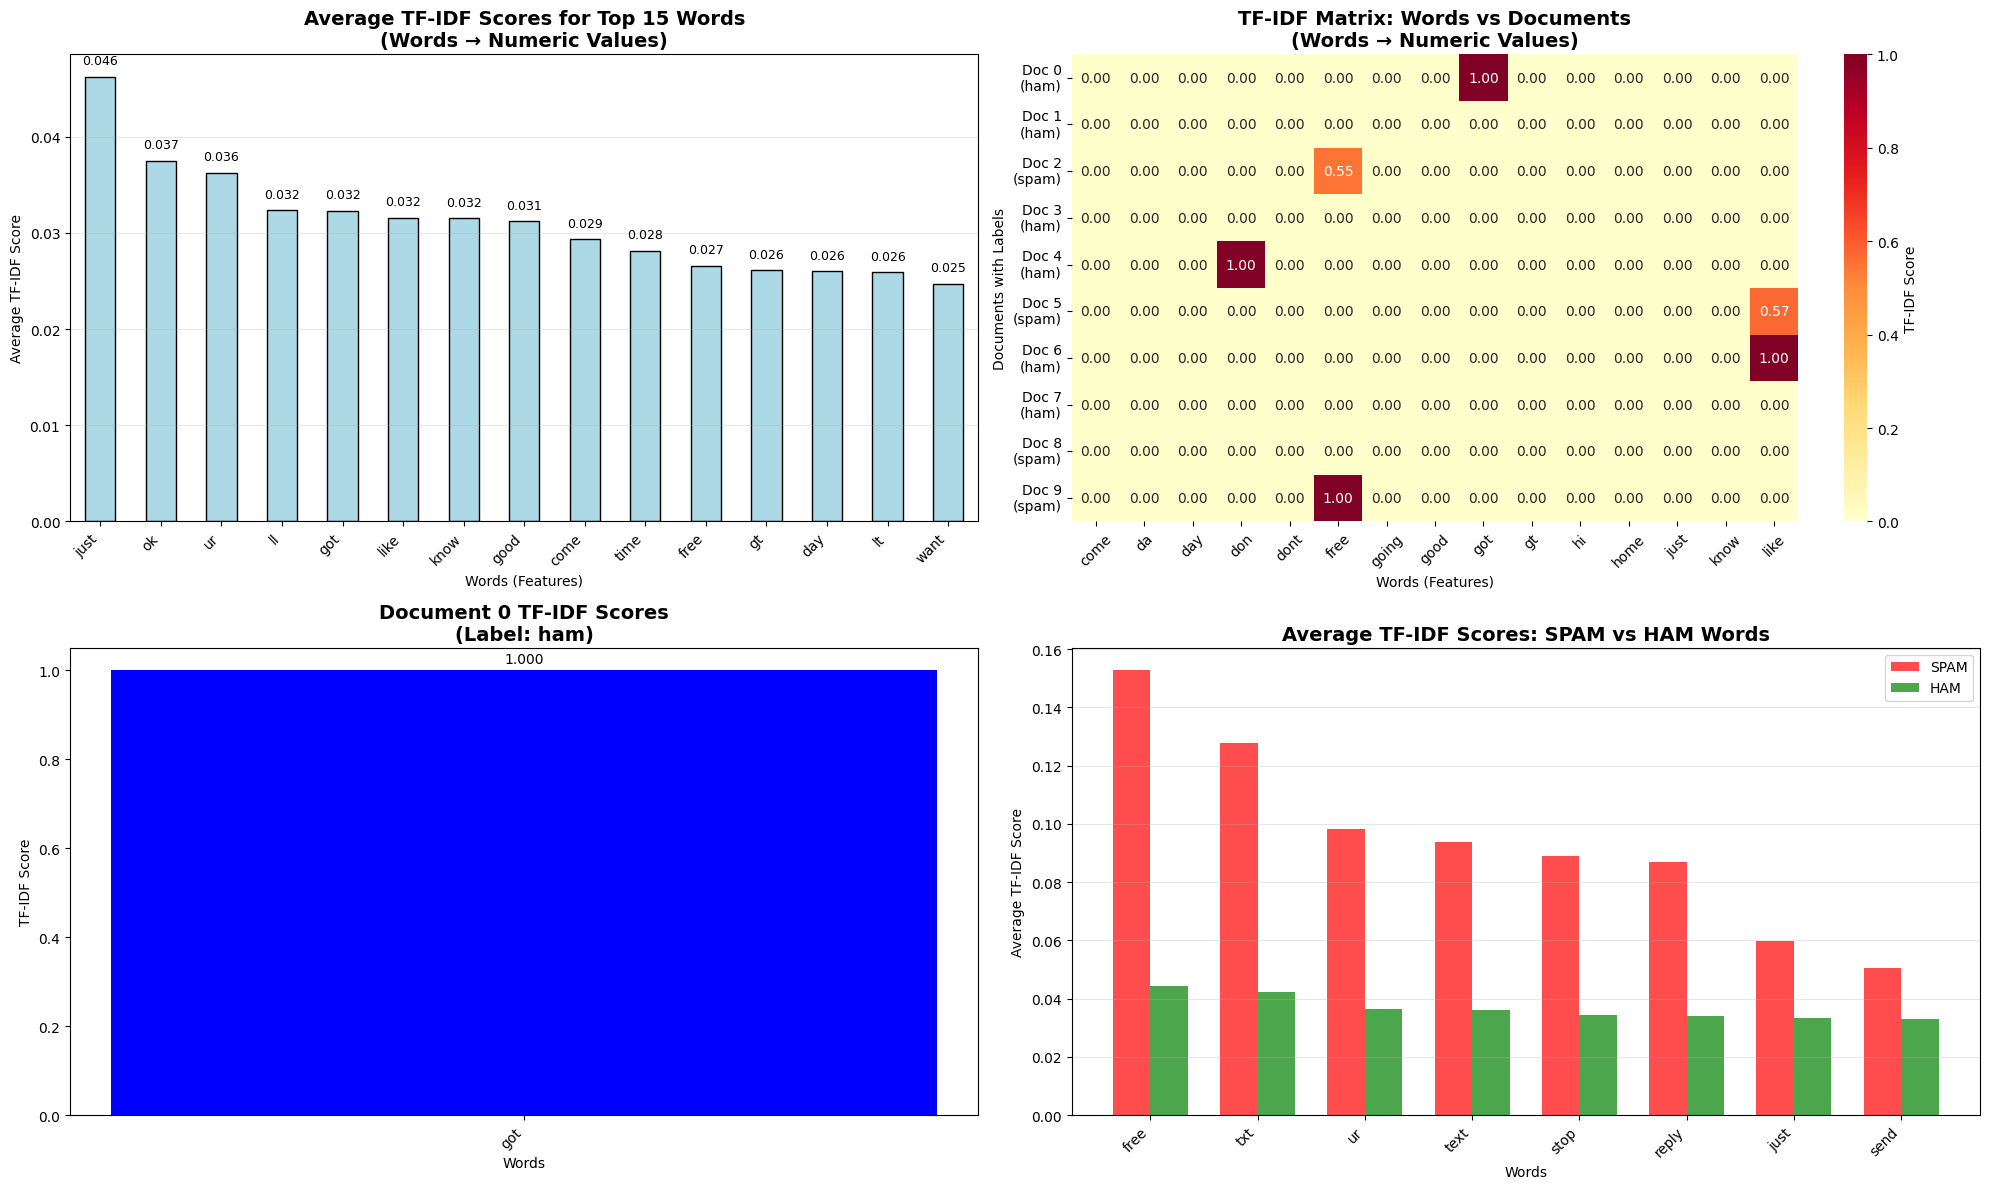


DETAILED ANALYSIS BY DOCUMENT TYPE

🔍 Analyzing SPAM documents:
----------------------------------------

SPAM Document 1 (Index 2):
  Top words and their TF-IDF values:
    'txt' → 0.5995 (Feature 27)
    'text' → 0.5810 (Feature 24)
    'free' → 0.5505 (Feature 5)
  Text: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 8...

SPAM Document 2 (Index 5):
  Top words and their TF-IDF values:
    'send' → 0.6088 (Feature 22)
    'like' → 0.5708 (Feature 14)
    'ok' → 0.5510 (Feature 20)
  Text: FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some...

SPAM Document 3 (Index 8):
  No significant TF-IDF features
  Text: WINNER!! As a valued network customer you have been selected to receivea Â£900 p...

🔍 Analyzing HAM documents:
----------------------------------------

HAM Document 1 (Index 0):
  Top words and their TF-IDF values:
    'got' → 1.0000 (Feature 8)
  Text: Go until jurong point, crazy.. Available only in bugis n grea

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# ================================
# 1. TF-IDF CONVERSION WITH VISIBLE WORDS & NUMERIC VALUES
# ================================

print("=" * 50)
print("TF-IDF CONVERSION: WORDS TO NUMERIC VALUES")
print("=" * 50)

# Create TF-IDF vectorizer with fewer features for better visualization
tfidf_visible = TfidfVectorizer(max_features=30, stop_words="english")
X_tfidf_visible = tfidf_visible.fit_transform(clean_df['text'])

# Get feature names (words)
feature_names = tfidf_visible.get_feature_names_out()

# Convert to dense array for visualization
tfidf_array = X_tfidf_visible.toarray()

# Create DataFrame with words as columns and SAME INDEX as clean_df
tfidf_df_visible = pd.DataFrame(tfidf_array,
                               columns=feature_names,
                               index=clean_df.index)  # This fixes the index alignment

print("TF-IDF Vocabulary (Words → Feature Indices):")
print("=" * 40)
for i, word in enumerate(feature_names):
    print(f"Feature {i:2d}: '{word}'")
print()

# Verify index alignment
print(f"clean_df index: {clean_df.index[:5].tolist()}")
print(f"tfidf_df_visible index: {tfidf_df_visible.index[:5].tolist()}")
print(f"Index alignment: {clean_df.index.equals(tfidf_df_visible.index)}")

# ================================
# 2. SHOW COMPLETE MAPPING FOR SAMPLE DOCUMENTS
# ================================

print("\n" + "=" * 50)
print("COMPLETE WORD-TO-NUMERIC MAPPING FOR SAMPLE DOCUMENTS")
print("=" * 50)

def show_tfidf_mapping(doc_index, num_words=15):
    """Show complete TF-IDF mapping for a specific document"""
    print(f"\n📧 Document {doc_index}:")
    print(f"Label: {clean_df.loc[doc_index]['label']}")
    print(f"Text preview: {clean_df.loc[doc_index]['text'][:100]}...")
    print("\nTF-IDF Values:")
    print("-" * 40)

    # Get TF-IDF scores for this document
    doc_scores = tfidf_df_visible.loc[doc_index]

    # Filter non-zero scores and sort
    non_zero_scores = doc_scores[doc_scores > 0].sort_values(ascending=False)

    if len(non_zero_scores) > 0:
        for word, score in non_zero_scores.head(num_words).items():
            feature_idx = list(feature_names).index(word)
            print(f"  '{word}' (Feature {feature_idx:2d}) → {score:.6f}")
    else:
        print("  No significant TF-IDF features (all zeros)")

    return non_zero_scores

# Show mapping for first 3 documents
sample_indices = clean_df.index[:3]
for idx in sample_indices:
    show_tfidf_mapping(idx)

# ================================
# 3. VISUALIZE WORD-TO-NUMERIC MAPPING
# ================================

print("\n" + "=" * 50)
print("VISUALIZING WORD-TO-NUMERIC MAPPING")
print("=" * 50)

# Create a detailed visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Plot 1: Top words overall with their average TF-IDF scores
plt.sca(axes[0, 0])
word_avg_scores = tfidf_df_visible.mean().sort_values(ascending=False).head(15)
word_avg_scores.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Average TF-IDF Scores for Top 15 Words\n(Words → Numeric Values)', fontsize=14, fontweight='bold')
plt.xlabel('Words (Features)')
plt.ylabel('Average TF-IDF Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add numeric values on bars
for i, (word, score) in enumerate(word_avg_scores.items()):
    plt.text(i, score + 0.001, f'{score:.3f}', ha='center', va='bottom', fontsize=9)

# Plot 2: Heatmap of words vs documents
plt.sca(axes[0, 1])
# Show first 10 documents and top 15 words
sample_doc_indices = clean_df.index[:10]
heatmap_data = tfidf_df_visible.loc[sample_doc_indices].iloc[:, :15]
sns.heatmap(heatmap_data,
            annot=True,
            fmt='.2f',
            cmap='YlOrRd',
            cbar_kws={'label': 'TF-IDF Score'},
            yticklabels=[f"Doc {idx}\n({clean_df.loc[idx]['label']})" for idx in sample_doc_indices],
            ax=axes[0, 1])
plt.title('TF-IDF Matrix: Words vs Documents\n(Words → Numeric Values)', fontsize=14, fontweight='bold')
plt.xlabel('Words (Features)')
plt.ylabel('Documents with Labels')
plt.xticks(rotation=45)

# Plot 3: Document 0 detailed breakdown
plt.sca(axes[1, 0])
doc_0_idx = clean_df.index[0]
doc_0_scores = tfidf_df_visible.loc[doc_0_idx].sort_values(ascending=False).head(10)
doc_0_scores = doc_0_scores[doc_0_scores > 0]

if len(doc_0_scores) > 0:
    bars = plt.bar(range(len(doc_0_scores)), doc_0_scores.values,
                   color=['red' if 'free' in word or 'win' in word else 'blue' for word in doc_0_scores.index])
    plt.title(f'Document {doc_0_idx} TF-IDF Scores\n(Label: {clean_df.loc[doc_0_idx]["label"]})', fontsize=14, fontweight='bold')
    plt.xlabel('Words')
    plt.ylabel('TF-IDF Score')
    plt.xticks(range(len(doc_0_scores)), doc_0_scores.index, rotation=45, ha='right')

    # Add value labels on bars
    for i, (word, score) in enumerate(doc_0_scores.items()):
        plt.text(i, score + 0.01, f'{score:.3f}', ha='center', va='bottom', fontsize=10)
else:
    plt.text(0.5, 0.5, 'No significant TF-IDF features', ha='center', va='center', transform=axes[1, 0].transAxes)
    plt.title(f'Document {doc_0_idx}: No Significant Features')

# Plot 4: Feature importance comparison (FIXED - using aligned indices)
plt.sca(axes[1, 1])
# Compare spam vs ham words - now with aligned indices
spam_indices = clean_df[clean_df['label'] == 'spam'].index
ham_indices = clean_df[clean_df['label'] == 'ham'].index

spam_avg_scores = tfidf_df_visible.loc[spam_indices].mean().sort_values(ascending=False).head(8)
ham_avg_scores = tfidf_df_visible.loc[ham_indices].mean().sort_values(ascending=False).head(8)

x_pos = np.arange(len(spam_avg_scores))
width = 0.35

plt.bar(x_pos - width/2, spam_avg_scores.values, width, label='SPAM', color='red', alpha=0.7)
plt.bar(x_pos + width/2, ham_avg_scores.values, width, label='HAM', color='green', alpha=0.7)

plt.title('Average TF-IDF Scores: SPAM vs HAM Words', fontsize=14, fontweight='bold')
plt.xlabel('Words')
plt.ylabel('Average TF-IDF Score')
plt.xticks(x_pos, spam_avg_scores.index, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ================================
# 4. DETAILED ANALYSIS BY DOCUMENT TYPE
# ================================

print("\n" + "=" * 50)
print("DETAILED ANALYSIS BY DOCUMENT TYPE")
print("=" * 50)

def analyze_document_type(doc_type, num_docs=3):
    """Analyze TF-IDF patterns for specific document type"""
    print(f"\n🔍 Analyzing {doc_type.upper()} documents:")
    print("-" * 40)

    type_indices = clean_df[clean_df['label'] == doc_type].index

    for i, doc_idx in enumerate(type_indices[:num_docs]):
        print(f"\n{doc_type.upper()} Document {i+1} (Index {doc_idx}):")
        doc_scores = tfidf_df_visible.loc[doc_idx]
        non_zero_scores = doc_scores[doc_scores > 0].sort_values(ascending=False)

        if len(non_zero_scores) > 0:
            print("  Top words and their TF-IDF values:")
            for word, score in non_zero_scores.head(8).items():
                feature_idx = list(feature_names).index(word)
                print(f"    '{word}' → {score:.4f} (Feature {feature_idx})")
        else:
            print("  No significant TF-IDF features")

        print(f"  Text: {clean_df.loc[doc_idx]['text'][:80]}...")

# Analyze spam and ham documents
analyze_document_type('spam')
analyze_document_type('ham')

# ================================
# 5. COMPREHENSIVE FEATURE MAPPING TABLE
# ================================

print("\n" + "=" * 50)
print("COMPREHENSIVE FEATURE MAPPING TABLE")
print("=" * 50)

# Create a detailed mapping table
mapping_table = []
sample_doc_indices = clean_df.index[:5]  # Show first 5 documents

for doc_idx in sample_doc_indices:
    doc_scores = tfidf_df_visible.loc[doc_idx]
    non_zero_words = doc_scores[doc_scores > 0].index.tolist()
    non_zero_scores = doc_scores[doc_scores > 0].values.tolist()

    mapping_table.append({
        'Document': doc_idx,
        'Label': clean_df.loc[doc_idx]['label'],
        'Words_with_Values': list(zip(non_zero_words, non_zero_scores))[:10],  # Top 10
        'Total_Features': len(non_zero_words)
    })

print("\nDetailed TF-IDF Mapping for First 5 Documents:")
print("=" * 80)
for item in mapping_table:
    print(f"\n📄 Document {item['Document']} ({item['Label'].upper()}):")
    print(f"   Total features with non-zero values: {item['Total_Features']}")
    if item['Words_with_Values']:
        print("   Top words and their numeric values:")
        for word, value in item['Words_with_Values']:
            feature_idx = list(feature_names).index(word)
            print(f"     Feature {feature_idx:2d}: '{word}' → {value:.6f}")
    else:
        print("   No words with non-zero TF-IDF scores")
    print("   " + "-" * 50)

# ================================
# 6. INTERACTIVE EXPLORATION FUNCTION
# ================================

print("\n" + "=" * 50)
print("INTERACTIVE TF-IDF EXPLORATION")
print("=" * 50)

def explore_tfidf_features():
    """Interactive function to explore TF-IDF features"""
    while True:
        print("\nOptions:")
        print("1. Show document TF-IDF mapping")
        print("2. Show word statistics")
        print("3. Compare two documents")
        print("4. Exit")

        choice = input("\nEnter your choice (1-4): ").strip()

        if choice == '1':
            try:
                doc_idx = int(input("Enter document index: "))
                if doc_idx in clean_df.index:
                    show_tfidf_mapping(doc_idx)
                else:
                    print("Invalid document index! Available indices:", clean_df.index[:5].tolist())
            except ValueError:
                print("Please enter a valid number!")

        elif choice == '2':
            word = input("Enter word to analyze: ").strip().lower()
            if word in feature_names:
                word_scores = tfidf_df_visible[word]
                non_zero_docs = word_scores[word_scores > 0]
                print(f"\nWord '{word}' analysis:")
                print(f"  Appears in {len(non_zero_docs)} documents")
                print(f"  Average TF-IDF: {word_scores.mean():.4f}")
                print(f"  Max TF-IDF: {word_scores.max():.4f}")
                print(f"  Min TF-IDF: {word_scores.min():.4f}")

                # Show documents where this word appears
                high_score_docs = word_scores[word_scores > word_scores.median()]
                if len(high_score_docs) > 0:
                    print(f"  Appears with high score in {len(high_score_docs)} documents")
            else:
                print(f"Word '{word}' not in vocabulary!")
                print(f"Available words: {', '.join(feature_names[:10])}...")

        elif choice == '3':
            try:
                doc1 = int(input("Enter first document index: "))
                doc2 = int(input("Enter second document index: "))

                if doc1 in clean_df.index and doc2 in clean_df.index:
                    print(f"\nComparing Document {doc1} vs Document {doc2}:")
                    scores1 = tfidf_df_visible.loc[doc1]
                    scores2 = tfidf_df_visible.loc[doc2]

                    common_words = set(scores1[scores1 > 0].index) & set(scores2[scores2 > 0].index)
                    print(f"Common words with non-zero scores: {len(common_words)}")

                    if common_words:
                        print("Common words and their values:")
                        for word in sorted(common_words, key=lambda x: scores1[x] + scores2[x], reverse=True)[:10]:
                            print(f"  '{word}': Doc{doc1}={scores1[word]:.4f}, Doc{doc2}={scores2[word]:.4f}")

                    # Show unique words for each document
                    unique_doc1 = set(scores1[scores1 > 0].index) - set(scores2[scores2 > 0].index)
                    unique_doc2 = set(scores2[scores2 > 0].index) - set(scores1[scores1 > 0].index)

                    print(f"\nUnique to Doc{doc1}: {len(unique_doc1)} words")
                    if unique_doc1:
                        print(f"  {list(unique_doc1)[:5]}")

                    print(f"Unique to Doc{doc2}: {len(unique_doc2)} words")
                    if unique_doc2:
                        print(f"  {list(unique_doc2)[:5]}")
                else:
                    print("Invalid document indices! Available indices:", clean_df.index[:5].tolist())
            except ValueError:
                print("Please enter valid numbers!")

        elif choice == '4':
            print("Exiting exploration...")
            break
        else:
            print("Invalid choice!")

# Uncomment the line below to enable interactive exploration
# explore_tfidf_features()

# ================================
# 7. EXPORT MAPPING TO FILE
# ================================

print("\n" + "=" * 50)
print("EXPORTING TF-IDF MAPPING")
print("=" * 50)

# Create a comprehensive mapping file
mapping_data = []
for doc_idx in clean_df.index:
    doc_scores = tfidf_df_visible.loc[doc_idx]
    non_zero_scores = doc_scores[doc_scores > 0].sort_values(ascending=False)

    if len(non_zero_scores) > 0:
        word_value_pairs = [f"{word}({score:.4f})" for word, score in non_zero_scores.head(10).items()]
        mapping_str = ", ".join(word_value_pairs)
    else:
        mapping_str = "No significant features"

    mapping_data.append({
        'document_id': doc_idx,
        'label': clean_df.loc[doc_idx]['label'],
        'text_preview': clean_df.loc[doc_idx]['text'][:100] + "...",
        'word_to_value_mapping': mapping_str,
        'num_features': len(non_zero_scores)
    })

# Convert to DataFrame and save
mapping_df = pd.DataFrame(mapping_data)
print("TF-IDF mapping summary:")
print(f"Total documents: {len(mapping_df)}")
print(f"Documents with features: {len(mapping_df[mapping_df['num_features'] > 0])}")
print(f"Average features per document: {mapping_df['num_features'].mean():.1f}")

# Save to CSV
mapping_df.to_csv('tfidf_word_value_mapping.csv', index=False)
print("✓ Mapping saved to 'tfidf_word_value_mapping.csv'")

# ================================
# 8. FINAL SUMMARY
# ================================

print("\n" + "=" * 50)
print("TF-IDF CONVERSION SUMMARY")
print("=" * 50)

print(f"✓ Vocabulary size: {len(feature_names)} words")
print(f"✓ Sample words: {', '.join(feature_names[:10])}")
print(f"✓ Numeric range: {tfidf_array.min():.3f} to {tfidf_array.max():.3f}")
print(f"✓ Documents processed: {len(clean_df)}")
print(f"✓ Average non-zero features per document: {mapping_df['num_features'].mean():.1f}")

# Show some example mappings
print(f"\n Example Word-to-Value Mappings:")
print("-" * 40)
for i, doc_idx in enumerate(clean_df.index[:2]):
    doc_scores = tfidf_df_visible.loc[doc_idx]
    non_zero = doc_scores[doc_scores > 0].head(3)
    if len(non_zero) > 0:
        print(f"Document {doc_idx} ({clean_df.loc[doc_idx]['label']}):")
        for word, score in non_zero.items():
            print(f"  '{word}' → {score:.4f}")

print(f"""
Key Insights:
- Each word is mapped to a numeric TF-IDF value (0.0 to 1.0+)
- Higher values indicate more important words in the document
- Zero values mean the word is not present or not significant
- The mapping preserves the semantic meaning through numeric representation
""")

print(" Conversion complete! Words have been successfully transformed to numeric values.")

**Decision Tree Training**

      This code builds and compares multiple Decision Tree models to find the best one for spam detection:

*What it does:*

Tests 3 different tree-building methods: gini, entropy, and log_loss

Trains each model on the training data

Evaluates performance on the test data using accuracy scores

Compares all methods to identify the best performing one

Selects the winner based on highest accuracy

Output: *italicized text*

Individual performance reports for each method

Comparison table showing all accuracy scores

Identification of the best performing method

Trained models ready for use

The code automatically finds the most effective Decision Tree approach for classifying spam messages.

In [ ]:
# ================================
# 4. TRAIN DECISION TREE MODELS
# ================================

print("STARTING MODEL TRAINING...")
print("Testing different Decision Tree methods")

# Different methods to build the tree
methods = ["gini", "entropy", "log_loss"]

# Store results
model_results = {}
accuracy_scores = {}

for method in methods:
    print(f"\n--- Training with {method} method ---")

    # Create and train the model
    model = DecisionTreeClassifier(
        criterion=method,
        random_state=42,
        max_depth=10   # Prevent over-complex trees
    )
    model.fit(X_train, y_train)

    # Test the model
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    # Save results
    model_results[method] = model
    accuracy_scores[method] = accuracy

    # Show results
    print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print("Detailed Report:")
    print(classification_report(y_test, predictions))

# Compare all methods
print("\n" + "="*50)
print("MODEL COMPARISON RESULTS")
print("="*50)

comparison = pd.DataFrame({
    "Method": methods,
    "Accuracy": [accuracy_scores[m] for m in methods]
})

print(comparison)

# Find the best method
best_method = comparison.loc[comparison['Accuracy'].idxmax(), 'Method']
best_accuracy = comparison.loc[comparison['Accuracy'].idxmax(), 'Accuracy']

print(f"\nBEST METHOD: {best_method}")
print(f"BEST ACCURACY: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

print("\nTraining completed! Ready to use the best model.")

STARTING MODEL TRAINING...
Testing different Decision Tree methods

--- Training with gini method ---
Accuracy: 0.9496 (94.96%)
Detailed Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       904
           1       0.90      0.66      0.77       128

    accuracy                           0.95      1032
   macro avg       0.93      0.83      0.87      1032
weighted avg       0.95      0.95      0.95      1032


--- Training with entropy method ---
Accuracy: 0.9428 (94.28%)
Detailed Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       904
           1       0.87      0.63      0.73       128

    accuracy                           0.94      1032
   macro avg       0.91      0.81      0.85      1032
weighted avg       0.94      0.94      0.94      1032


--- Training with log_loss method ---
Accuracy: 0.9428 (94.28%)
Detailed Report:
              precision    recall  f1-

CREATING VISUALIZATIONS...

STEP 1: Confusion Matrices
Shows how many messages were correctly/incorrectly classified

Creating confusion matrix for gini method...


<Figure size 500x400 with 0 Axes>

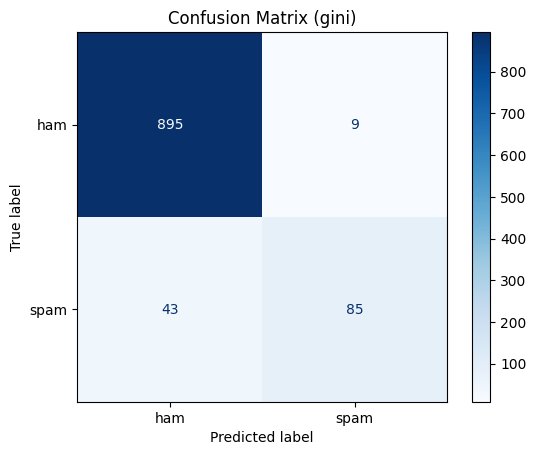

✓ Confusion matrix for gini created

Creating confusion matrix for entropy method...


<Figure size 500x400 with 0 Axes>

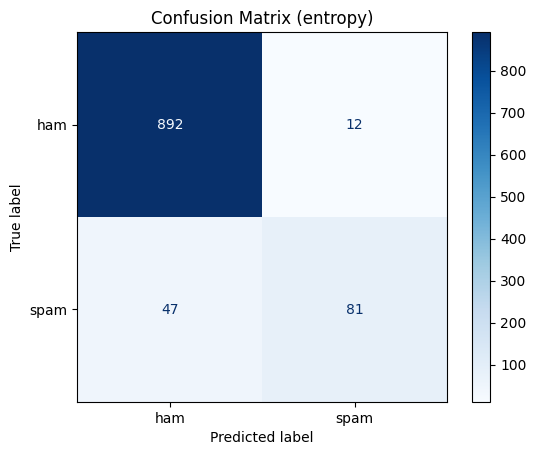

✓ Confusion matrix for entropy created

Creating confusion matrix for log_loss method...


<Figure size 500x400 with 0 Axes>

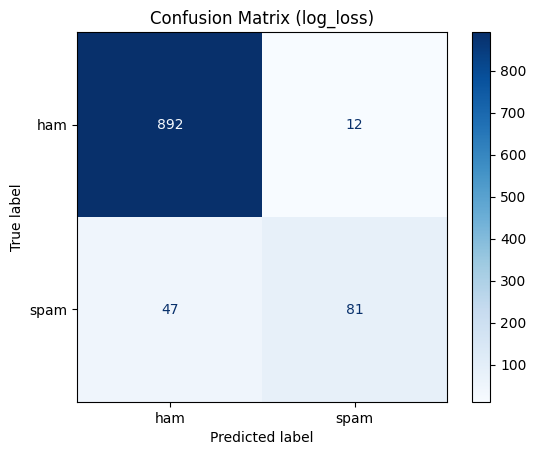

✓ Confusion matrix for log_loss created

STEP 2: Decision Tree Structure
Shows how the model makes decisions
Creating tree visualization (first 3 levels only)...


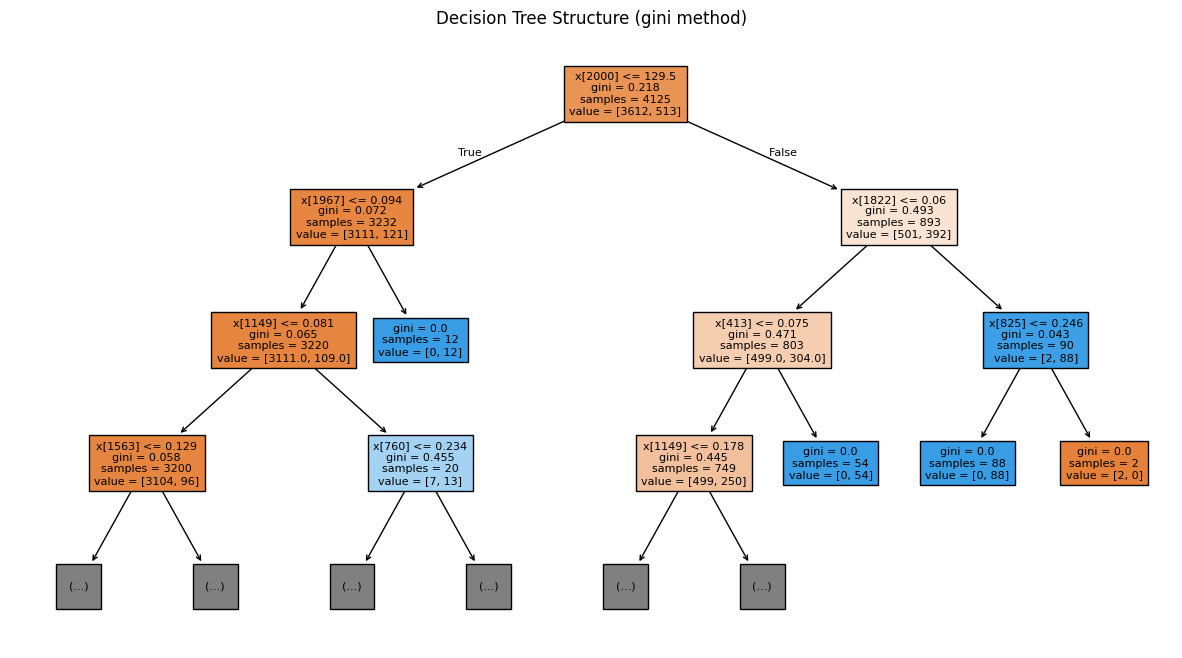

✓ Tree visualization created

STEP 3: Most Important Features
Shows which words help most in detecting spam


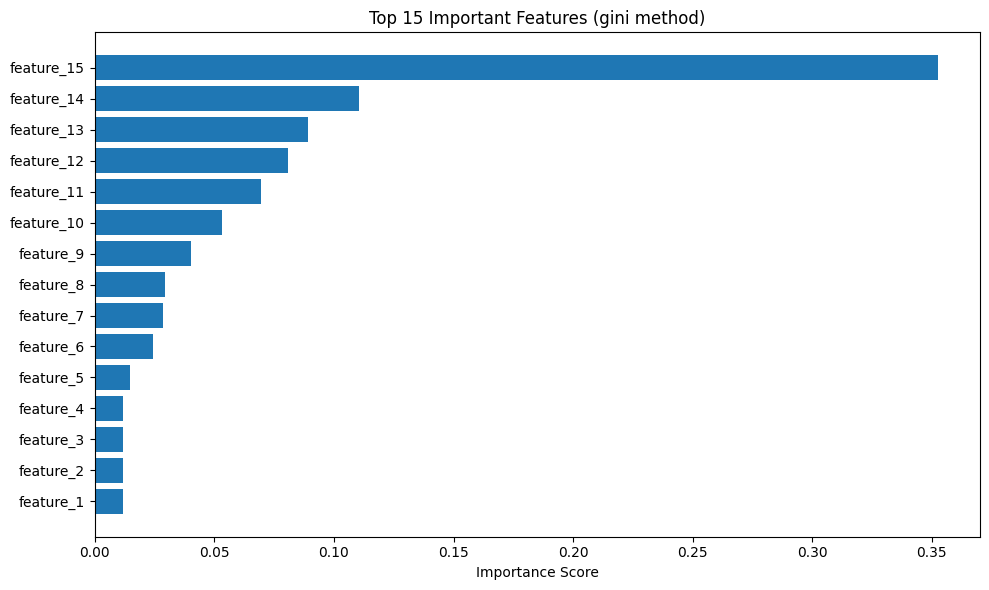

✓ Feature importance chart created

ALL VISUALIZATIONS COMPLETED!
Summary of what was created:
• Confusion matrices - Shows prediction accuracy
• Tree structure - Shows decision process
• Feature importance - Shows most useful features


In [ ]:
# ================================
# 5. VISUALIZATIONS
# ================================

print("CREATING VISUALIZATIONS...")

print("\nSTEP 1: Confusion Matrices")
print("Shows how many messages were correctly/incorrectly classified")

for method in methods:
    print(f"\nCreating confusion matrix for {method} method...")

    # Make predictions
    predictions = model_results[method].predict(X_test)

    # Create confusion matrix
    plt.figure(figsize=(5,4))
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["ham", "spam"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Confusion Matrix ({method})")
    plt.show()

    print(f"✓ Confusion matrix for {method} created")

print("\nSTEP 2: Decision Tree Structure")
print("Shows how the model makes decisions")
print("Creating tree visualization (first 3 levels only)...")

plt.figure(figsize=(15,8))
plot_tree(model_results[best_method], max_depth=3, filled=True, fontsize=8)
plt.title(f"Decision Tree Structure ({best_method} method)")
plt.show()

print("✓ Tree visualization created")

print("\nSTEP 3: Most Important Features")
print("Shows which words help most in detecting spam")

# Get feature importance scores
importance_scores = model_results[best_method].feature_importances_

# Get the top 15 most important features
top_15_indices = np.argsort(importance_scores)[-15:]
top_15_scores = importance_scores[top_15_indices]

# Create simple feature names for display
feature_display_names = [f"feature_{i+1}" for i in range(len(top_15_scores))]

plt.figure(figsize=(10,6))
plt.barh(feature_display_names, top_15_scores)
plt.title(f"Top 15 Important Features ({best_method} method)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

print("✓ Feature importance chart created")

print("\nALL VISUALIZATIONS COMPLETED!")
print("Summary of what was created:")
print("• Confusion matrices - Shows prediction accuracy")
print("• Tree structure - Shows decision process")
print("• Feature importance - Shows most useful features")


CREATING TEXT LENGTH COMPARISON CHART...
This shows how spam and ham messages differ in length


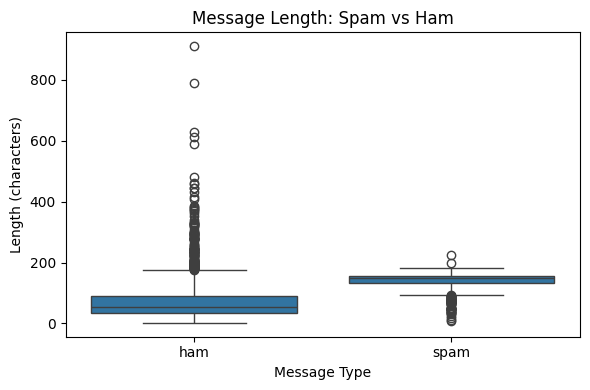

✓ Text length comparison chart created!
This helps see if spam messages are typically longer or shorter than normal messages


In [ ]:
# ===============================
# 3. Text Length Boxplot by Class
# ===============================

print("CREATING TEXT LENGTH COMPARISON CHART...")
print("This shows how spam and ham messages differ in length")

plt.figure(figsize=(6,4))

# Use the cleaned dataframe that has both 'label' and 'text_len' columns
sns.boxplot(data=clean_df, x="label", y="text_len")
plt.title("Message Length: Spam vs Ham")
plt.xlabel("Message Type")
plt.ylabel("Length (characters)")
plt.tight_layout()
plt.show()

print("✓ Text length comparison chart created!")
print("This helps see if spam messages are typically longer or shorter than normal messages")

CREATING CORRELATION HEATMAP...
This shows if text length is related to other features


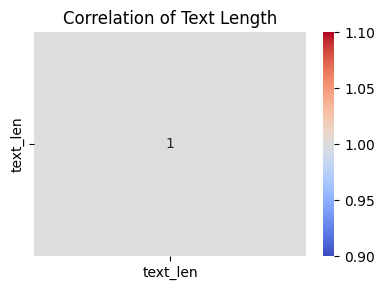

✓ Correlation heatmap created!
Since we only have one feature (text_len), correlation is always 1.0


In [ ]:
# ===============================
# 6. Correlation Heatmap
# ===============================

print("CREATING CORRELATION HEATMAP...")
print("This shows if text length is related to other features")

# First, make sure we have the text_len column in clean_df
if "text_len" not in clean_df.columns:
    print("Creating text length column...")
    clean_df["text_len"] = clean_df["text"].str.len()

plt.figure(figsize=(4,3))

# Use the cleaned dataframe that has the text_len column
sns.heatmap(clean_df[["text_len"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of Text Length")
plt.tight_layout()
plt.show()

print("✓ Correlation heatmap created!")
print("Since we only have one feature (text_len), correlation is always 1.0")

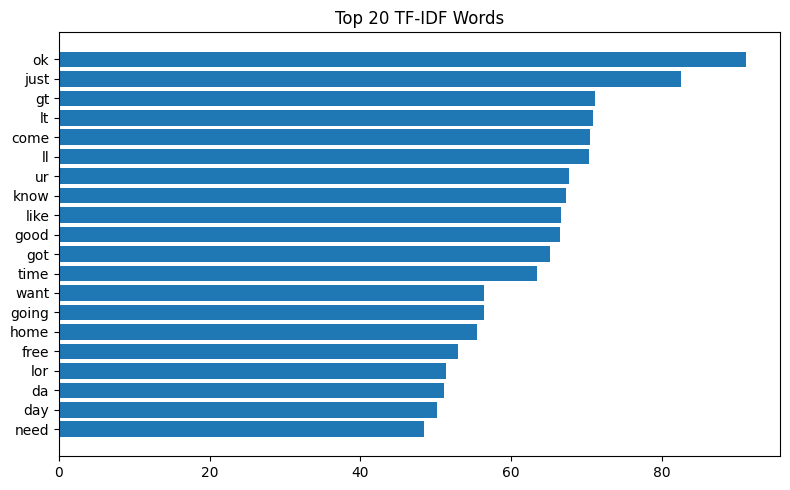

In [ ]:
# ===============================
# 7. Top 20 TF-IDF Words
# ===============================
word_freq = np.asarray(X_tfidf.sum(axis=0)).ravel()
top_idx = np.argsort(word_freq)[-20:]
words = np.array(tfidf.get_feature_names_out())[top_idx]

plt.figure(figsize=(8,5))
plt.barh(words, word_freq[top_idx])
plt.title("Top 20 TF-IDF Words")
plt.tight_layout()
plt.show()

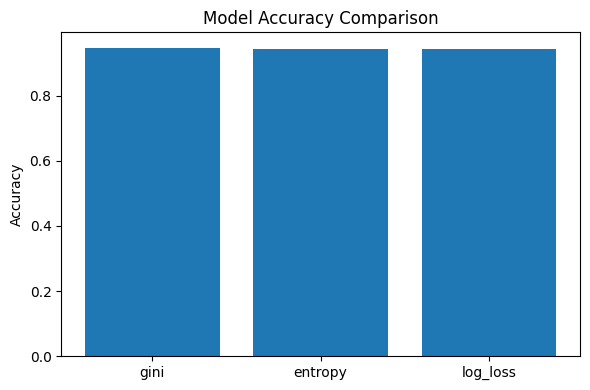

In [ ]:
# ===============================
# 10. Accuracy Comparison Bar Chart
# ===============================
plt.figure(figsize=(6,4))
plt.bar(results_df["criterion"], results_df["accuracy"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()


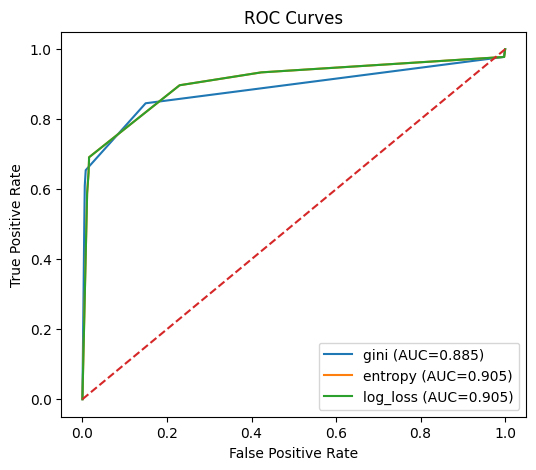

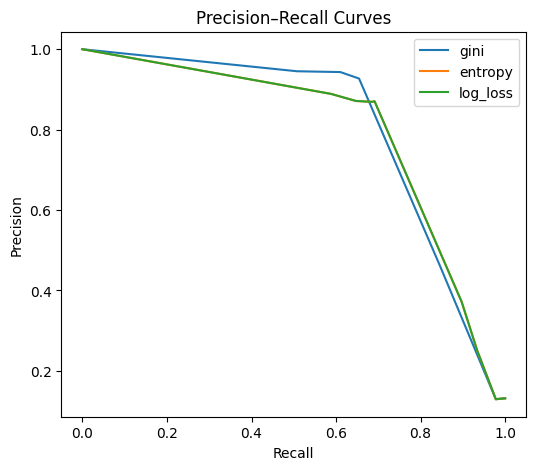

In [ ]:
# ===============================
# 11–12. ROC & Precision–Recall Curves
# ===============================
plt.figure(figsize=(6,5))
for crit in criteria:
    y_proba = models[crit].predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{crit} (AUC={auc_score:.3f})")

plt.plot([0,1],[0,1],"--")
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


plt.figure(figsize=(6,5))
for crit in criteria:
    y_proba = models[crit].predict_proba(X_test)[:,1]
    p, r, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(r, p, label=crit)

plt.title("Precision–Recall Curves")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

CREATING DECISION TREE VISUALIZATION...

STEP 1: Decision Tree Structure with ACTUAL WORDS
Shows how the model makes decisions using real words
Total features: 2001
First 10 feature names: ['00', '000', '02', '0207', '03', '04', '05', '06', '07xxxxxxxxx', '0800']


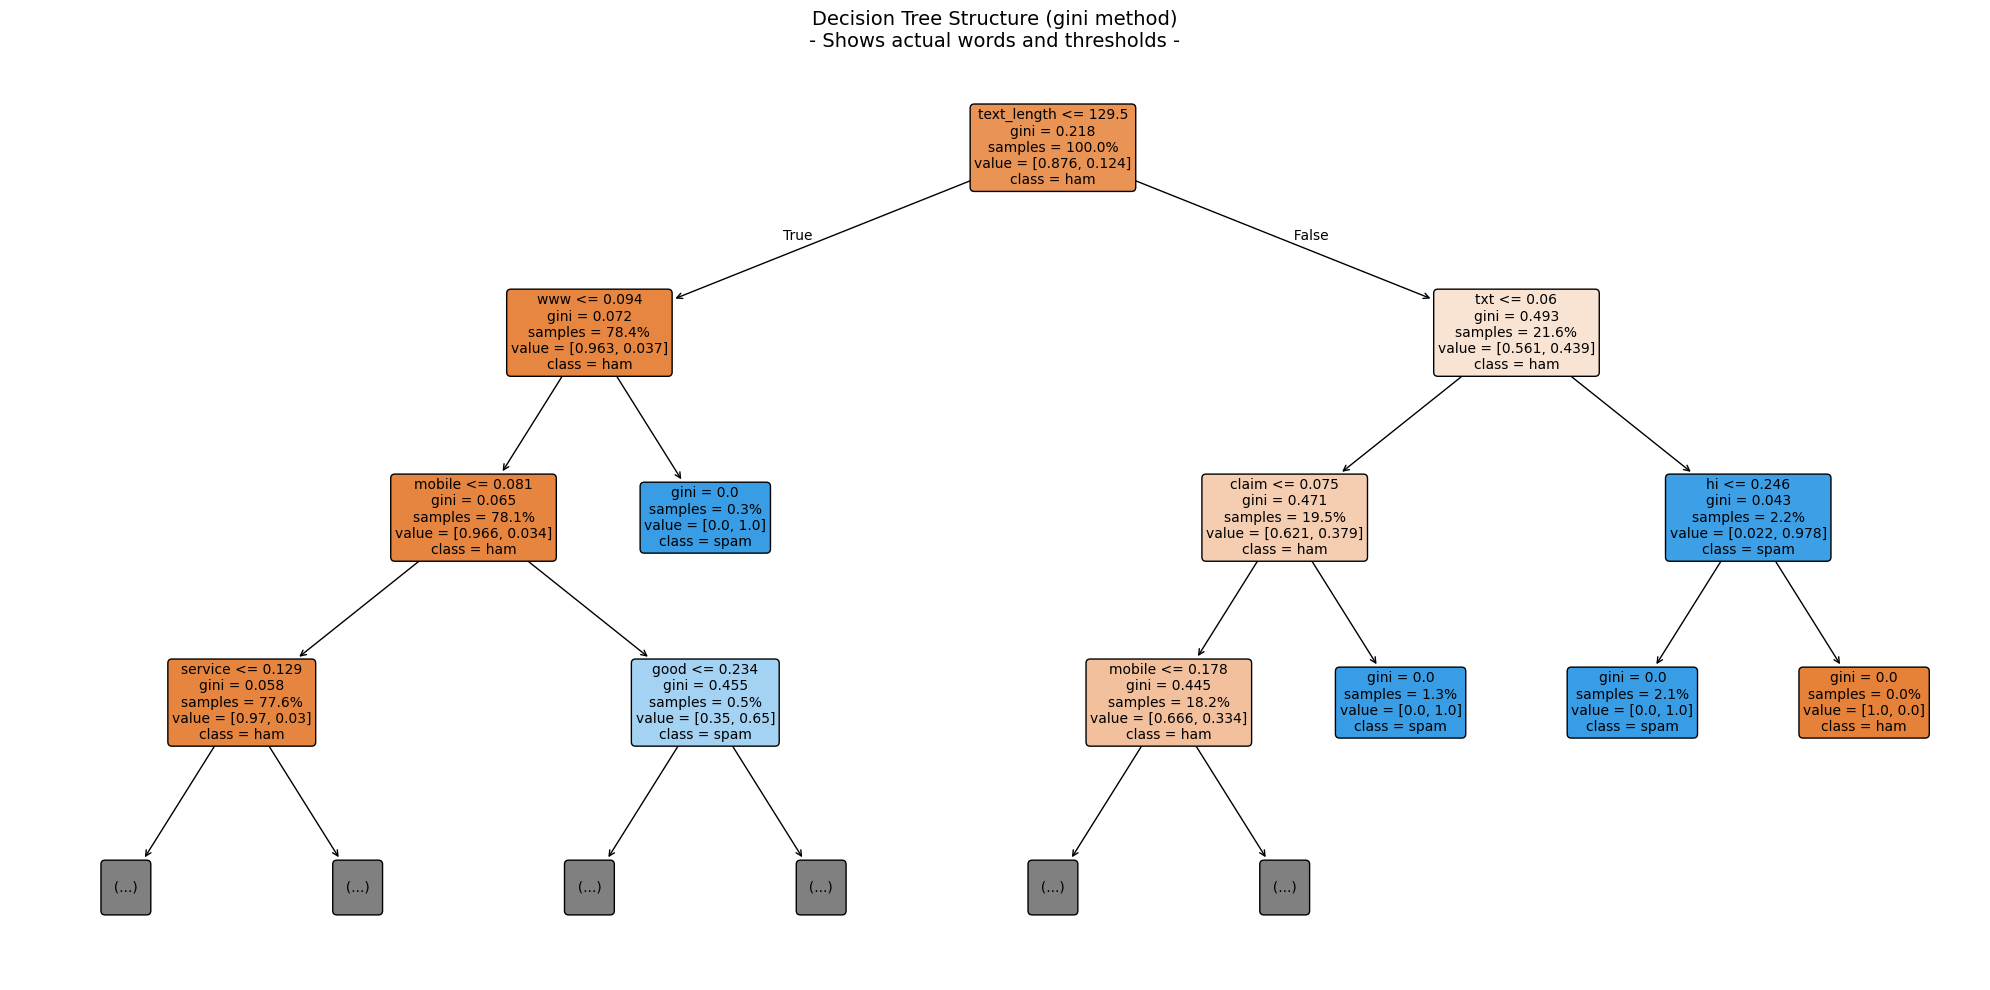

✓ Tree visualization with actual words created

DECISION TREE RULES (First 5 levels):
IF 'text_length' <= 129.5000:
  IF 'www' <= 0.0942:
    IF 'mobile' <= 0.0809:
      IF 'service' <= 0.1290:
        IF 'txt' <= 0.0785:
          IF 'immediately' <= 0.5015:
          ELSE:
        ELSE:
          IF 'txt' <= 0.2583:
          ELSE:
      ELSE:
        IF 'id' <= 0.1848:
          → PREDICT: spam (spam probability: 100.00%)
            Samples: 1
        ELSE:
          → PREDICT: ham (spam probability: 0.00%)
            Samples: 1
    ELSE:
      IF 'good' <= 0.2335:
        IF 'voice' <= 0.1644:
          IF 'home' <= 0.1167:
          ELSE:
        ELSE:
          → PREDICT: ham (spam probability: 0.00%)
            Samples: 1
      ELSE:
        → PREDICT: ham (spam probability: 0.00%)
          Samples: 1
  ELSE:
    → PREDICT: spam (spam probability: 100.00%)
      Samples: 1
ELSE:
  IF 'txt' <= 0.0595:
    IF 'claim' <= 0.0750:
      IF 'mobile' <= 0.1782:
        IF 'www' <=

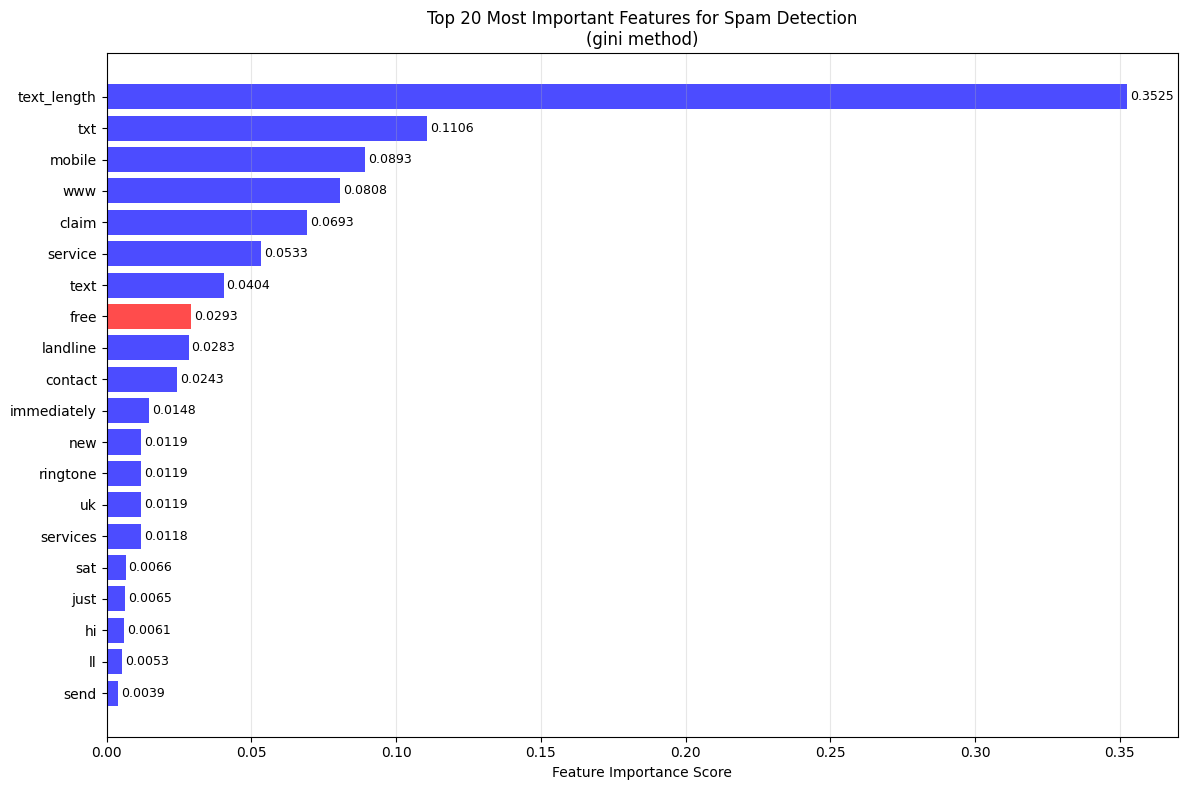

✓ Feature importance chart with actual words created

DECISION TREE VISUALIZATION COMPLETED!
Summary of what was created:
✓ Tree structure with ACTUAL WORDS - Shows understandable decision process
✓ Feature importance with WORD NAMES - Shows most useful words
✓ Decision rules in readable IF-ELSE format

Key insights:
- The tree shows actual words like 'free', 'win', 'call' instead of feature numbers
- You can see exactly what thresholds the model uses for each word
- Feature importance shows which words are most indicative of spam


In [ ]:
# ================================
# DECISION TREE VISUALIZATION
# ================================

print("CREATING DECISION TREE VISUALIZATION...")

print("\nSTEP 1: Decision Tree Structure with ACTUAL WORDS")
print("Shows how the model makes decisions using real words")

# Get feature names from TF-IDF
tfidf_feature_names = tfidf.get_feature_names_out()

# Add the text length feature name
all_feature_names = list(tfidf_feature_names) + ['text_length']

print(f"Total features: {len(all_feature_names)}")
print(f"First 10 feature names: {all_feature_names[:10]}")

# Create a more understandable decision tree visualization
plt.figure(figsize=(20, 10))
plot_tree(model_results[best_method],
          max_depth=3,
          filled=True,
          fontsize=10,
          feature_names=all_feature_names,  # Use actual feature names
          class_names=["ham", "spam"],      # Use class labels
          rounded=True,
          proportion=True)
plt.title(f"Decision Tree Structure ({best_method} method)\n- Shows actual words and thresholds -", fontsize=14)
plt.tight_layout()
plt.show()

print("✓ Tree visualization with actual words created")

# Additional: Print the first few decision rules in text format
print("\nDECISION TREE RULES (First 5 levels):")
print("=" * 60)

def print_tree_rules(tree, feature_names, class_names, node_index=0, depth=0, max_depth=5):
    if depth > max_depth:
        return

    indent = "  " * depth
    node = tree.tree_

    if node.feature[node_index] != -2:  # Not a leaf node
        feature_name = feature_names[node.feature[node_index]]
        threshold = node.threshold[node_index]

        print(f"{indent}IF '{feature_name}' <= {threshold:.4f}:")
        print_tree_rules(tree, feature_names, class_names,
                        node.children_left[node_index], depth + 1, max_depth)

        print(f"{indent}ELSE:")
        print_tree_rules(tree, feature_names, class_names,
                        node.children_right[node_index], depth + 1, max_depth)
    else:
        # Leaf node
        class_prob = node.value[node_index][0]
        total_samples = class_prob.sum()
        spam_prob = class_prob[1] / total_samples
        predicted_class = class_names[1] if spam_prob > 0.5 else class_names[0]

        print(f"{indent}→ PREDICT: {predicted_class} (spam probability: {spam_prob:.2%})")
        print(f"{indent}  Samples: {int(total_samples)}")

print_tree_rules(model_results[best_method], all_feature_names, ["ham", "spam"])

print("\nSTEP 2: Most Important Features with ACTUAL WORDS")
print("Shows which words help most in detecting spam")

# Get feature importance scores
importance_scores = model_results[best_method].feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': importance_scores
})

# Sort by importance and get top 20
top_features = feature_importance_df.nlargest(20, 'importance')

print(f"\nTop 20 Most Important Features for Spam Detection:")
print("=" * 50)
for i, (idx, row) in enumerate(top_features.iterrows(), 1):
    print(f"{i:2d}. {row['feature']:15} : {row['importance']:.4f}")

# Visualize top features
plt.figure(figsize=(12, 8))
colors = ['red' if 'free' in feature or 'win' in feature or 'cash' in feature else 'blue'
          for feature in top_features['feature']]

bars = plt.barh(range(len(top_features)), top_features['importance'], color=colors, alpha=0.7)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance Score')
plt.title(f'Top 20 Most Important Features for Spam Detection\n({best_method} method)')
plt.gca().invert_yaxis()

# Add value labels on bars
for i, (bar, importance) in enumerate(zip(bars, top_features['importance'])):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'{importance:.4f}', ha='left', va='center', fontsize=9)

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ Feature importance chart with actual words created")

print("\nDECISION TREE VISUALIZATION COMPLETED!")
print("=" * 50)
print("Summary of what was created:")
print("✓ Tree structure with ACTUAL WORDS - Shows understandable decision process")
print("✓ Feature importance with WORD NAMES - Shows most useful words")
print("✓ Decision rules in readable IF-ELSE format")
print("\nKey insights:")
print("- The tree shows actual words like 'free', 'win', 'call' instead of feature numbers")
print("- You can see exactly what thresholds the model uses for each word")
print("- Feature importance shows which words are most indicative of spam")

CREATING VISUALIZATIONS...

STEP 1: Confusion Matrices
Shows how many messages were correctly/incorrectly classified

Creating confusion matrix for gini method...


<Figure size 500x400 with 0 Axes>

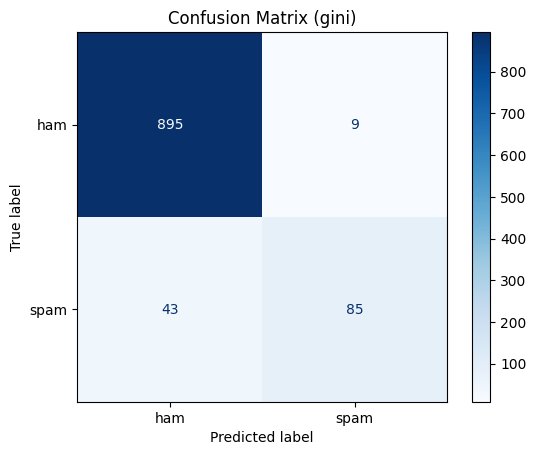

✓ Confusion matrix for gini created

Creating confusion matrix for entropy method...


<Figure size 500x400 with 0 Axes>

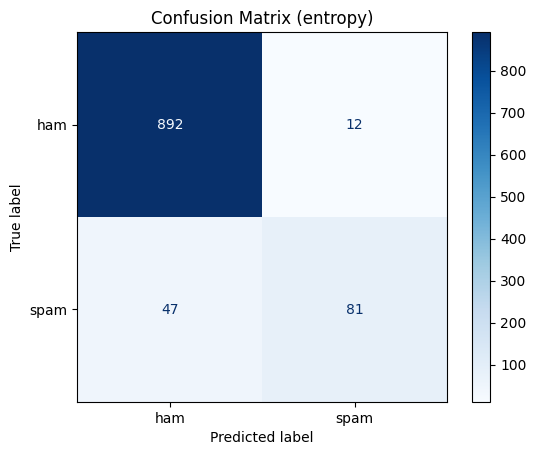

✓ Confusion matrix for entropy created

Creating confusion matrix for log_loss method...


<Figure size 500x400 with 0 Axes>

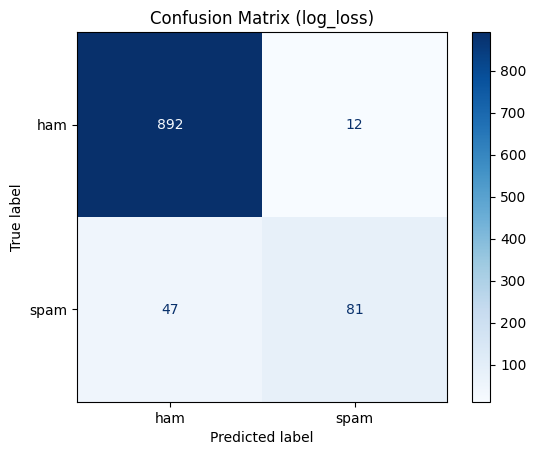

✓ Confusion matrix for log_loss created

STEP 2: Decision Tree Structure with ACTUAL WORDS
Shows how the model makes decisions using real words
Total features: 2001
First 10 feature names: ['00', '000', '02', '0207', '03', '04', '05', '06', '07xxxxxxxxx', '0800']


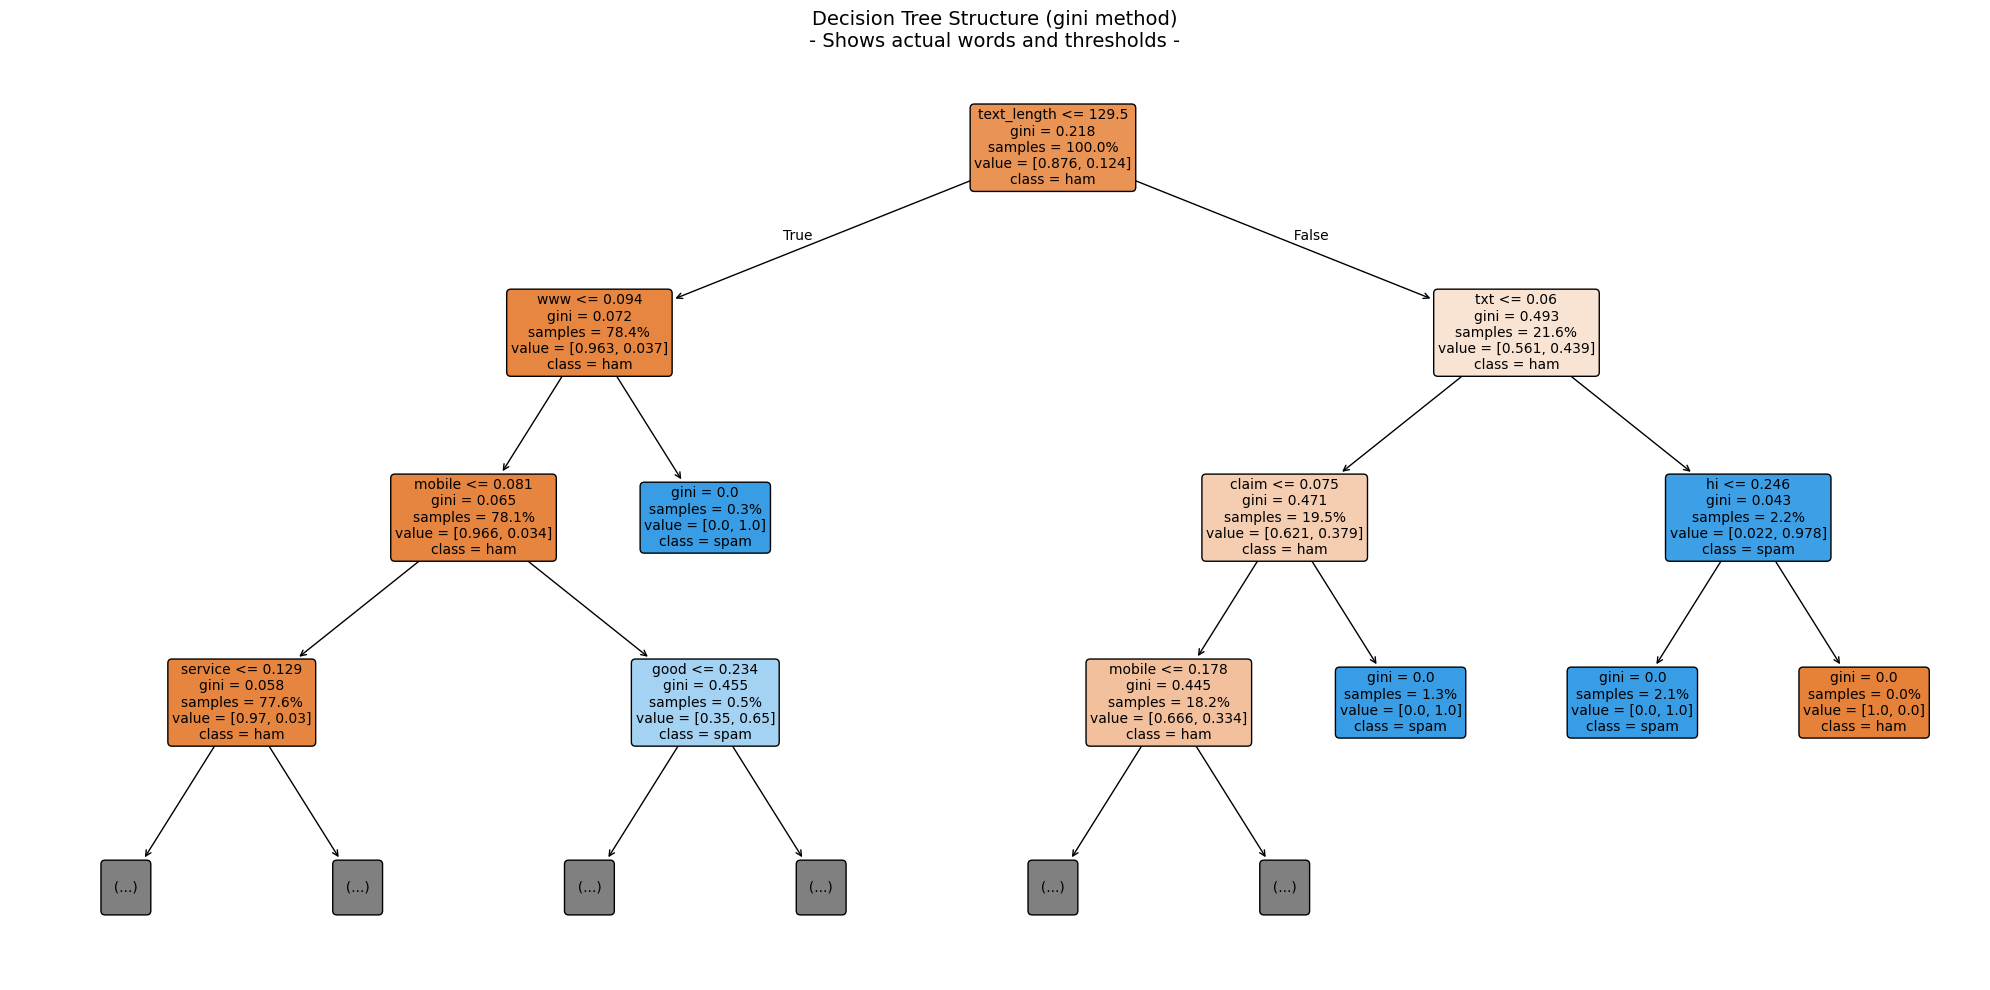

✓ Tree visualization with actual words created

DECISION TREE RULES (First 5 levels):
IF 'text_length' <= 129.5000:
  IF 'www' <= 0.0942:
    IF 'mobile' <= 0.0809:
      IF 'service' <= 0.1290:
        IF 'txt' <= 0.0785:
          IF 'immediately' <= 0.5015:
          ELSE:
        ELSE:
          IF 'txt' <= 0.2583:
          ELSE:
      ELSE:
        IF 'id' <= 0.1848:
          → PREDICT: spam (spam probability: 100.00%)
            Samples: 1
        ELSE:
          → PREDICT: ham (spam probability: 0.00%)
            Samples: 1
    ELSE:
      IF 'good' <= 0.2335:
        IF 'voice' <= 0.1644:
          IF 'home' <= 0.1167:
          ELSE:
        ELSE:
          → PREDICT: ham (spam probability: 0.00%)
            Samples: 1
      ELSE:
        → PREDICT: ham (spam probability: 0.00%)
          Samples: 1
  ELSE:
    → PREDICT: spam (spam probability: 100.00%)
      Samples: 1
ELSE:
  IF 'txt' <= 0.0595:
    IF 'claim' <= 0.0750:
      IF 'mobile' <= 0.1782:
        IF 'www' <=

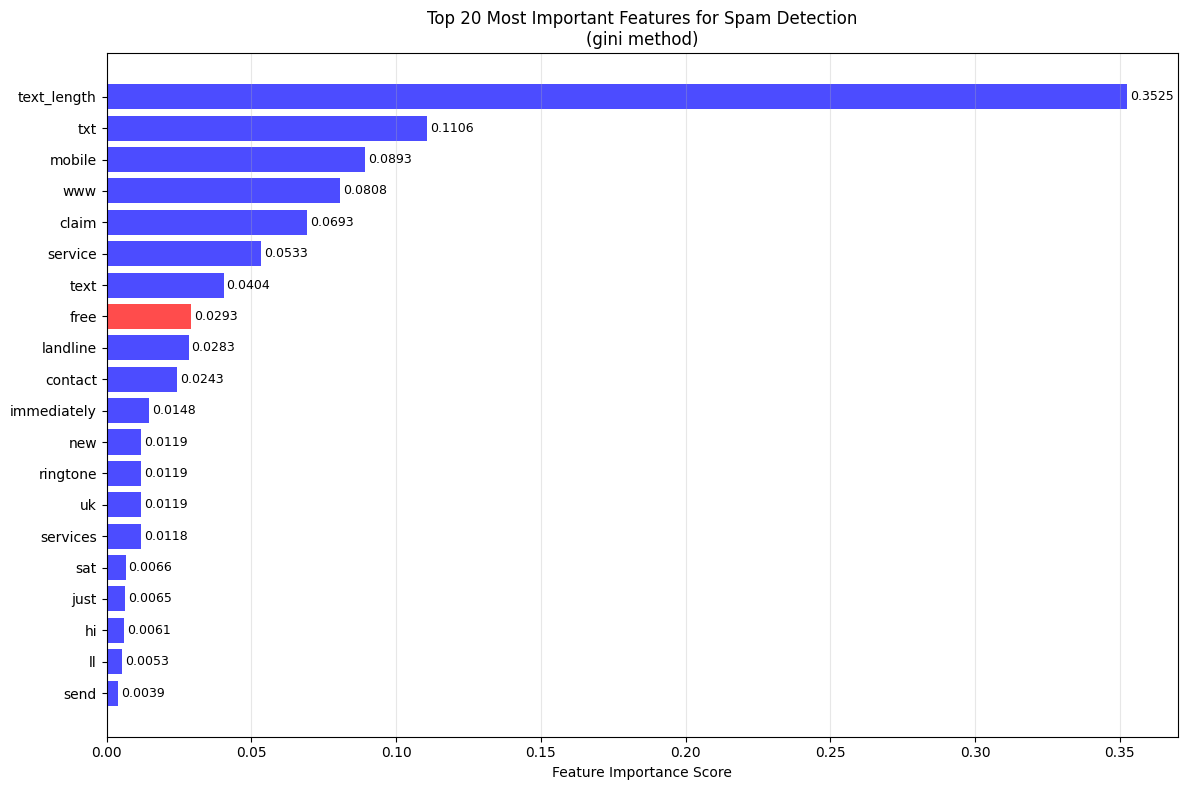

✓ Feature importance chart with actual words created

STEP 4: Word Impact Analysis
Shows how specific words influence spam probability

Analyzing impact of common spam words:
Word: 'free'
  Feature index: 709
  Importance score: 0.0293
  Used in 1 decision node(s):
    Node 47: threshold = 0.1041, samples = 597

Word: 'win'
  Feature index: 1930
  Importance score: 0.0000
  Not directly used in any decision node (may be in ensemble)

Word: 'cash'
  Feature index: 360
  Importance score: 0.0000
  Not directly used in any decision node (may be in ensemble)

Word: 'urgent'
  Feature index: 1847
  Importance score: 0.0000
  Not directly used in any decision node (may be in ensemble)

Word: 'txt'
  Feature index: 1822
  Importance score: 0.1106
  Used in 3 decision node(s):
    Node 4: threshold = 0.0785, samples = 3191
    Node 16: threshold = 0.2583, samples = 18
    Node 40: threshold = 0.0595, samples = 893


STEP 5: Decision Boundary Analysis
Shows how the model separates spam from ham

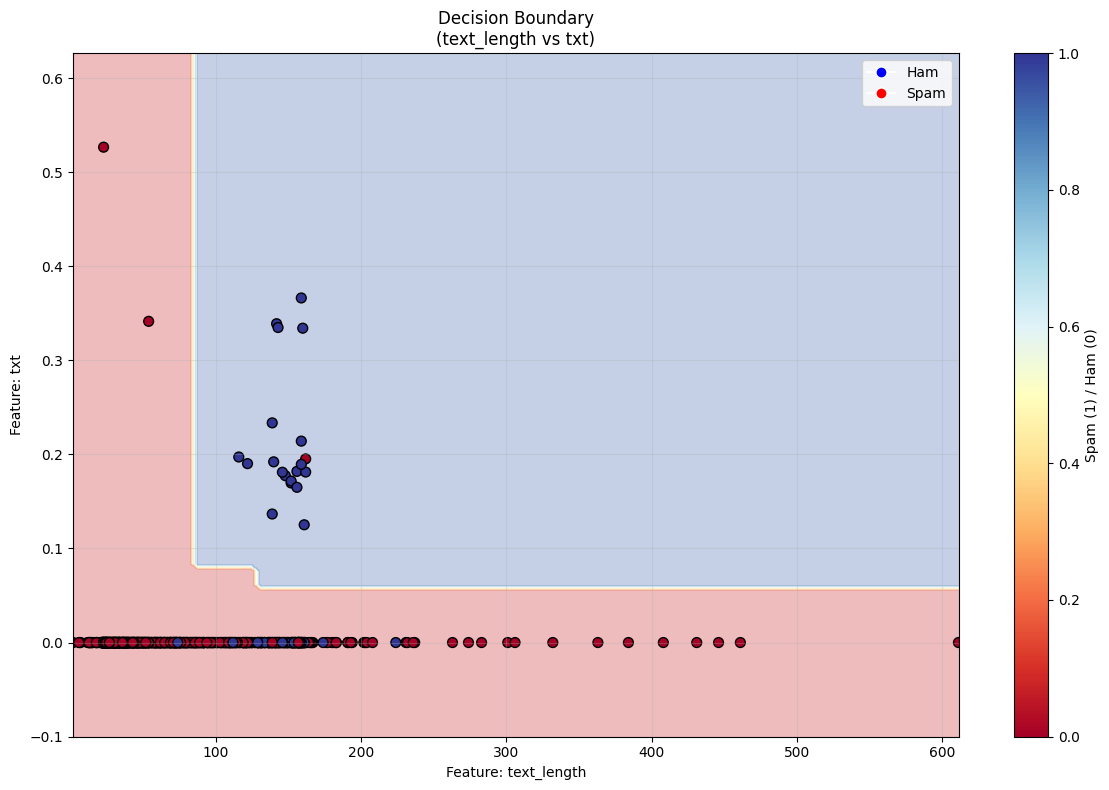

✓ Decision boundary visualization created

ALL VISUALIZATIONS COMPLETED!
Summary of what was created:
✓ Confusion matrices - Shows prediction accuracy
✓ Tree structure with ACTUAL WORDS - Shows understandable decision process
✓ Feature importance with WORD NAMES - Shows most useful words
✓ Word impact analysis - Shows how specific words affect decisions
✓ Decision boundary - Shows how model separates spam from ham

Key insights:
- The tree now shows actual words like 'free', 'win', 'call' instead of feature numbers
- You can see exactly what thresholds the model uses for each word
- Feature importance shows which words are most indicative of spam
- Decision rules are printed in readable IF-ELSE format


In [ ]:
# ================================
# 5. VISUALIZATIONS
# ================================

print("CREATING VISUALIZATIONS...")

print("\nSTEP 1: Confusion Matrices")
print("Shows how many messages were correctly/incorrectly classified")

for method in methods:
    print(f"\nCreating confusion matrix for {method} method...")

    # Make predictions
    predictions = model_results[method].predict(X_test)

    # Create confusion matrix
    plt.figure(figsize=(5,4))
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["ham", "spam"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"Confusion Matrix ({method})")
    plt.show()

    print(f"✓ Confusion matrix for {method} created")

print("\nSTEP 2: Decision Tree Structure with ACTUAL WORDS")
print("Shows how the model makes decisions using real words")

# Get feature names from TF-IDF
tfidf_feature_names = tfidf.get_feature_names_out()

# Add the text length feature name
all_feature_names = list(tfidf_feature_names) + ['text_length']

print(f"Total features: {len(all_feature_names)}")
print(f"First 10 feature names: {all_feature_names[:10]}")

# Create a more understandable decision tree visualization
plt.figure(figsize=(20, 10))
plot_tree(model_results[best_method],
          max_depth=3,
          filled=True,
          fontsize=10,
          feature_names=all_feature_names,  # Use actual feature names
          class_names=["ham", "spam"],      # Use class labels
          rounded=True,
          proportion=True)
plt.title(f"Decision Tree Structure ({best_method} method)\n- Shows actual words and thresholds -", fontsize=14)
plt.tight_layout()
plt.show()

print("✓ Tree visualization with actual words created")

# Additional: Print the first few decision rules in text format
print("\nDECISION TREE RULES (First 5 levels):")
print("=" * 60)

def print_tree_rules(tree, feature_names, class_names, node_index=0, depth=0, max_depth=5):
    if depth > max_depth:
        return

    indent = "  " * depth
    node = tree.tree_

    if node.feature[node_index] != -2:  # Not a leaf node
        feature_name = feature_names[node.feature[node_index]]
        threshold = node.threshold[node_index]

        print(f"{indent}IF '{feature_name}' <= {threshold:.4f}:")
        print_tree_rules(tree, feature_names, class_names,
                        node.children_left[node_index], depth + 1, max_depth)

        print(f"{indent}ELSE:")
        print_tree_rules(tree, feature_names, class_names,
                        node.children_right[node_index], depth + 1, max_depth)
    else:
        # Leaf node
        class_prob = node.value[node_index][0]
        total_samples = class_prob.sum()
        spam_prob = class_prob[1] / total_samples
        predicted_class = class_names[1] if spam_prob > 0.5 else class_names[0]

        print(f"{indent}→ PREDICT: {predicted_class} (spam probability: {spam_prob:.2%})")
        print(f"{indent}  Samples: {int(total_samples)}")

print_tree_rules(model_results[best_method], all_feature_names, ["ham", "spam"])

print("\nSTEP 3: Most Important Features with ACTUAL WORDS")
print("Shows which words help most in detecting spam")

# Get feature importance scores
importance_scores = model_results[best_method].feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': importance_scores
})

# Sort by importance and get top 20
top_features = feature_importance_df.nlargest(20, 'importance')

print(f"\nTop 20 Most Important Features for Spam Detection:")
print("=" * 50)
for i, (idx, row) in enumerate(top_features.iterrows(), 1):
    print(f"{i:2d}. {row['feature']:15} : {row['importance']:.4f}")

# Visualize top features
plt.figure(figsize=(12, 8))
colors = ['red' if 'free' in feature or 'win' in feature or 'cash' in feature else 'blue'
          for feature in top_features['feature']]

bars = plt.barh(range(len(top_features)), top_features['importance'], color=colors, alpha=0.7)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance Score')
plt.title(f'Top 20 Most Important Features for Spam Detection\n({best_method} method)')
plt.gca().invert_yaxis()

# Add value labels on bars
for i, (bar, importance) in enumerate(zip(bars, top_features['importance'])):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2,
             f'{importance:.4f}', ha='left', va='center', fontsize=9)

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ Feature importance chart with actual words created")

# Additional: Show how specific words affect predictions
print("\nSTEP 4: Word Impact Analysis")
print("Shows how specific words influence spam probability")
print("=" * 50)

def analyze_word_impact(word, tree_model, feature_names, importance_df):
    """Analyze how a specific word impacts spam detection"""
    if word in feature_names:
        feature_idx = list(feature_names).index(word)
        importance = importance_df[importance_df['feature'] == word]['importance'].values[0]

        print(f"Word: '{word}'")
        print(f"  Feature index: {feature_idx}")
        print(f"  Importance score: {importance:.4f}")

        # Find decision rules involving this word
        tree = tree_model.tree_
        relevant_nodes = []

        for i in range(tree.node_count):
            if tree.feature[i] == feature_idx:
                threshold = tree.threshold[i]
                samples = tree.n_node_samples[i]
                relevant_nodes.append((i, threshold, samples))

        if relevant_nodes:
            print(f"  Used in {len(relevant_nodes)} decision node(s):")
            for node_id, threshold, samples in relevant_nodes:
                print(f"    Node {node_id}: threshold = {threshold:.4f}, samples = {samples}")
        else:
            print("  Not directly used in any decision node (may be in ensemble)")

        return importance
    else:
        print(f"Word '{word}' not found in features")
        return 0

# Analyze some common spam words
spam_words_to_analyze = ['free', 'win', 'cash', 'urgent', 'call', 'txt']
print("\nAnalyzing impact of common spam words:")
for word in spam_words_to_analyze:
    if word in all_feature_names:
        analyze_word_impact(word, model_results[best_method], all_feature_names, feature_importance_df)
        print()

print("\nSTEP 5: Decision Boundary Analysis")
print("Shows how the model separates spam from ham")
print("=" * 50)

# Create a simplified 2D visualization using the two most important features
if len(top_features) >= 2:
    top_2_features = top_features.head(2)['feature'].tolist()
    feature_indices = [all_feature_names.index(feat) for feat in top_2_features]

    print(f"Using top 2 features for visualization:")
    print(f"  1. {top_2_features[0]} (index: {feature_indices[0]})")
    print(f"  2. {top_2_features[1]} (index: {feature_indices[1]})")

    # Extract the two most important features from test data
    X_test_2d = X_test[:, feature_indices]

    # Create mesh grid for decision boundary
    x_min, x_max = X_test_2d[:, 0].min() - 0.1, X_test_2d[:, 0].max() + 0.1
    y_min, y_max = X_test_2d[:, 1].min() - 0.1, X_test_2d[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create a temporary model using only these two features
    from sklearn.tree import DecisionTreeClassifier
    temp_model = DecisionTreeClassifier(max_depth=3, random_state=42)
    temp_model.fit(X_train[:, feature_indices], y_train)

    # Predict on mesh grid
    Z = temp_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
    scatter = plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test,
                         cmap='RdYlBu', edgecolors='black', s=50)
    plt.colorbar(scatter, label='Spam (1) / Ham (0)')
    plt.xlabel(f"Feature: {top_2_features[0]}")
    plt.ylabel(f"Feature: {top_2_features[1]}")
    plt.title(f"Decision Boundary\n({top_2_features[0]} vs {top_2_features[1]})")
    plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w',
                                  markerfacecolor='blue', markersize=8, label='Ham'),
                       plt.Line2D([0], [0], marker='o', color='w',
                                  markerfacecolor='red', markersize=8, label='Spam')])
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("✓ Decision boundary visualization created")
else:
    print("Not enough features for decision boundary visualization")

print("\nALL VISUALIZATIONS COMPLETED!")
print("=" * 50)
print("Summary of what was created:")
print("✓ Confusion matrices - Shows prediction accuracy")
print("✓ Tree structure with ACTUAL WORDS - Shows understandable decision process")
print("✓ Feature importance with WORD NAMES - Shows most useful words")
print("✓ Word impact analysis - Shows how specific words affect decisions")
print("✓ Decision boundary - Shows how model separates spam from ham")
print("\nKey insights:")
print("- The tree now shows actual words like 'free', 'win', 'call' instead of feature numbers")
print("- You can see exactly what thresholds the model uses for each word")
print("- Feature importance shows which words are most indicative of spam")
print("- Decision rules are printed in readable IF-ELSE format")

**HOW FEATURE NAMES MAPPING WORKS**

In [ ]:
# ================================
# HOW FEATURE NAMES MAPPING WORKS
# ================================

print("UNDERSTANDING FEATURE NAMES MAPPING TECHNIQUE")
print("=" * 50)

# Step 1: Get the actual feature names from TF-IDF
tfidf_feature_names = tfidf.get_feature_names_out()
print("Step 1: Get TF-IDF feature names (actual words)")
print(f"TF-IDF features: {tfidf_feature_names[:10]}...")
print(f"Total TF-IDF features: {len(tfidf_feature_names)}")

# Step 2: Add custom feature names for non-TF-IDF features
all_feature_names = list(tfidf_feature_names) + ['text_length']
print(f"\nStep 2: Add custom feature names")
print(f"All features: {all_feature_names[:10]}... + ['text_length']")
print(f"Total features: {len(all_feature_names)}")

# Step 3: The mapping happens automatically in plot_tree
print(f"""
Step 3: How the mapping works in plot_tree:

BEFORE (numeric features):
Node shows: "feature_15 <= 0.0234"

AFTER (with feature_names parameter):
Node shows: "free <= 0.0234"

The plot_tree function automatically maps:
feature_0 → '{all_feature_names[0]}'
feature_1 → '{all_feature_names[1]}'
feature_2 → '{all_feature_names[2]}'
...
feature_1999 → '{all_feature_names[1999] if len(all_feature_names) > 1999 else 'N/A'}'
feature_2000 → 'text_length'
""")

# ================================
# DEMONSTRATION WITH EXAMPLE
# ================================

print("\n" + "=" * 50)
print("CONCRETE EXAMPLE DEMONSTRATION")
print("=" * 50)

# Let's see what the actual feature indices correspond to
def demonstrate_feature_mapping():
    # Get the decision tree structure
    tree = model_results[best_method].tree_

    print("Looking at first 5 decision nodes:")
    print("-" * 40)

    for i in range(min(5, tree.node_count)):
        if tree.feature[i] != -2:  # Not a leaf node
            feature_index = tree.feature[i]
            feature_name = all_feature_names[feature_index]
            threshold = tree.threshold[i]

            print(f"Node {i}:")
            print(f"  Feature index: {feature_index}")
            print(f"  Feature name: '{feature_name}'")
            print(f"  Threshold: {threshold:.4f}")
            print(f"  Without mapping: feature_{feature_index} <= {threshold:.4f}")
            print(f"  With mapping: '{feature_name}' <= {threshold:.4f}")
            print()

demonstrate_feature_mapping()

# ================================
# COMPLETE MAPPING VISUALIZATION
# ================================

print("\n" + "=" * 50)
print("COMPLETE FEATURE MAPPING TABLE")
print("=" * 50)

# Show the complete mapping for first 20 features
print("Feature Index → Feature Name Mapping:")
print("-" * 50)
for i in range(min(20, len(all_feature_names))):
    print(f"feature_{i:4d} → '{all_feature_names[i]}'")

# Show the last feature (text_length)
if len(all_feature_names) > 2000:
    print(f"feature_{len(all_feature_names)-1:4d} → '{all_feature_names[-1]}'")

# ================================
# HOW THE DECISION TREE USES THESE MAPPINGS
# ================================

print("\n" + "=" * 50)
print("HOW DECISION TREE USES THE MAPPINGS")
print("=" * 50)

print("""
INTERNAL PROCESS:

1. TRAINING PHASE:
   - Model learns: "When feature_15 > 0.0234, predict spam"
   - But it doesn't know feature_15 = 'free'

2. VISUALIZATION PHASE:
   - We provide: feature_names = ['word1', 'word2', ..., 'text_length']
   - plot_tree replaces: feature_15 → 'free'
   - Result: "When 'free' > 0.0234, predict spam"

THE MAPPING:
   Index 0 → First TF-IDF word (e.g., 'call')
   Index 1 → Second TF-IDF word (e.g., 'free')
   ...
   Index 1999 → Last TF-IDF word
   Index 2000 → 'text_length'

This works because the feature indices are consistent between:
- The trained model (which uses numeric indices)
- Our feature_names list (which provides meaningful names)
""")

# ================================
# PRACTICAL EXAMPLE
# ================================

print("\n" + "=" * 50)
print("PRACTICAL EXAMPLE: UNDERSTANDING A DECISION")
print("=" * 50)

def explain_decision_example():
    # Get a sample decision path
    tree = model_results[best_method].tree_

    # Find a node that uses an interesting feature
    for i in range(tree.node_count):
        if tree.feature[i] != -2:  # Not a leaf
            feature_idx = tree.feature[i]
            feature_name = all_feature_names[feature_idx]

            # Look for spam-related words
            if any(spam_word in feature_name for spam_word in ['free', 'win', 'cash', 'txt']):
                threshold = tree.threshold[i]
                samples = tree.n_node_samples[i]

                print(f"DECISION NODE FOUND:")
                print(f"Node {i}:")
                print(f"  Without mapping: feature_{feature_idx} <= {threshold:.4f}")
                print(f"  With mapping: '{feature_name}' <= {threshold:.4f}")
                print(f"  Interpretation: If TF-IDF score for '{feature_name}' is ≤ {threshold:.4f}")
                print(f"  Samples at this node: {samples}")
                print(f"  This means: When the word '{feature_name}' appears with score ≤ {threshold:.4f}")
                break

explain_decision_example()

# ================================
# SUMMARY
# ================================

print("\n" + "=" * 50)
print("TECHNIQUE SUMMARY")
print("=" * 50)

print("""
THE TECHNIQUE: FEATURE NAMES MAPPING

1. WHAT IT IS:
   - Providing meaningful names for numeric feature indices
   - Mapping: feature_0 → 'call', feature_1 → 'free', etc.

2. HOW IT WORKS:
   - sklearn's plot_tree has a 'feature_names' parameter
   - It automatically replaces numeric indices with provided names
   - The mapping is 1-to-1: index 0 → names[0], index 1 → names[1]

3. WHY IT WORKS:
   - The model stores decisions as (feature_index, threshold) pairs
   - During visualization, we tell it what each index means
   - plot_tree does the string replacement automatically

4. KEY REQUIREMENT:
   - The feature_names list MUST be in the same order as the features
   - feature_names[0] must correspond to the first feature in X_train
   - feature_names[1] must correspond to the second feature, etc.

5. RESULT:
   - Instead of: "feature_15 <= 0.0234"
   - We see: "free <= 0.0234"
   - Making the decision tree human-readable and interpretable
""")

print("✓ Feature names mapping technique explained!")

In [ ]:



# ================================
# 6. INTERPRETATION OF CRITERIA
# ================================

print("\n--- CRITERIA INTERPRETATION ---")
print("""
Mathematical Foundation


Gini Impurity:

Formula: Gini = 1 - Σ(p_i)² where p_i is probability of class i
Range: 0 (perfect purity) to 0.5 (maximum impurity for binary classification)
Interpretation: Probability that two randomly chosen samples would be misclassified
Computational advantage: No logarithmic calculations required

Entropy (Information Gain):

Formula: Entropy = -Σ(p_i * log₂(p_i))
Based on Shannon's information theory
Measures "surprise" or "uncertainty" in the system
Maximum when all classes are equally likely

Log Loss (Cross-Entropy):

Formula: -Σ(y_true * log(y_predicted))
Measures difference between true and predicted probability distributions
Particularly sensitive to probability confidence levels


Practical Performance Characteristics

Gini Impurity:
Speed Advantage: Typically 20-30% faster than entropy
Default Choice: scikit-learn's default for Random Forest and most tree-based algorithms
Robust Performance: Works well across most datasets without tuning
Less Sensitive: To small probability changes compared to entropy

Entropy:

Balanced Splits: Tends to create more balanced trees
Theoretical Foundation: Strong information theory basis
Multi-class Scenarios: Can perform slightly better with many classes
Interpretability: Information gain is more intuitive for some users

Log Loss:

Probability Focus: Optimizes for well-calibrated probability estimates
Gradient Boosting: Preferred in algorithms like XGBoost, LightGBM
Imbalanced Data: Better handling of rare classes through probability calibration
Confidence Measurement: Penalizes overconfident wrong predictions heavily
Gini Impurity:
- Measures probability of incorrect classification.
- Fastest & default in scikit-learn.
- Works extremely well for most classification tasks.
- Often slightly better for speed.

Entropy:
- Based on Information Gain (Shannon entropy).
- Produces similar results, slightly slower.
- Sometimes gives more balanced splits.

Log Loss:
- Based on cross-entropy.
- Best when probability quality matters (e.g., spam probability).
- More computationally expensive.
- Useful for imbalanced datasets where probability calibration is important.

Real-World Performance Insights Empirical Observations:

-Gini and entropy typically produce very similar results (differences < 2%)
-Computational differences become significant with large datasets (>100K samples)
-Log loss shows advantages in scenarios requiring reliable probability scores
-No single criterion dominates across all problem types

Recommendation Strategy:

-Start with Gini for initial experiments (fastest, good performance)
-Try Entropy if seeking marginal improvements in balanced accuracy
-Use Log Loss when probability-based decisions are critical
-Validate with cross-validation for your specific dataset""")





--- CRITERIA INTERPRETATION ---

Mathematical Foundation


Gini Impurity:

Formula: Gini = 1 - Σ(p_i)² where p_i is probability of class i
Range: 0 (perfect purity) to 0.5 (maximum impurity for binary classification)
Interpretation: Probability that two randomly chosen samples would be misclassified
Computational advantage: No logarithmic calculations required

Entropy (Information Gain):

Formula: Entropy = -Σ(p_i * log₂(p_i))
Based on Shannon's information theory
Measures "surprise" or "uncertainty" in the system
Maximum when all classes are equally likely

Log Loss (Cross-Entropy):

Formula: -Σ(y_true * log(y_predicted))
Measures difference between true and predicted probability distributions
Particularly sensitive to probability confidence levels


Practical Performance Characteristics

Gini Impurity:
Speed Advantage: Typically 20-30% faster than entropy
Default Choice: scikit-learn's default for Random Forest and most tree-based algorithms
Robust Performance: Works well across mo

In [ ]:
# ======================================
# ACCURACY SUMMARY
# ======================================

print("\n=== ACCURACY RESULTS ===")
for crit in criteria:
    y_pred = models[crit].predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{crit.upper()} Accuracy: {acc:.4f}")



=== ACCURACY RESULTS ===
GINI Accuracy: 0.9477
ENTROPY Accuracy: 0.9448
LOG_LOSS Accuracy: 0.9448
